In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler

from yellowbrick.model_selection import FeatureImportances



## Dataframes

In [195]:
# Read Fer Dataset
emotion_fer = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection_fer.csv")

# Read archieve Dataset
emotion_archieve = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection_archieve.csv")

In [196]:
# Read CSV file for combine dataframe
emotion_csv = pd.concat([emotion_archieve, emotion_fer])

In [197]:
# Display first 5 rows of 3 dataframes
emotion_fer.head()

face  confidence  gaze_0_x  gaze_0_y  gaze_0_z  gaze_1_x  gaze_1_y  \
0   0.0       0.975  0.291979  0.089452 -0.952232  0.076873  0.111098   
1   0.0       0.625  0.082212 -0.064150 -0.994548 -0.119963  0.099111   
2   0.0       0.925 -0.107190  0.080964 -0.990936 -0.202938  0.010448   
3   0.0       0.875  0.159809  0.267341 -0.950258 -0.154324  0.255865   
4   0.0       0.975  0.230670  0.125137 -0.964952 -0.147993  0.120513   

   gaze_1_z  gaze_angle_x  gaze_angle_y  ...  AU23_c  AU25_c  AU26_c  AU28_c  \
0 -0.990832         0.188         0.103  ...     0.0     0.0     0.0     1.0   
1 -0.987819        -0.019         0.018  ...     0.0     1.0     0.0     1.0   
2 -0.979136        -0.156         0.046  ...     1.0     0.0     0.0     0.0   
3 -0.954315         0.003         0.268  ...     0.0     0.0     0.0     1.0   
4 -0.981619         0.042         0.126  ...     0.0     0.0     0.0     0.0   

   AU45_c  frame  face_id  timestamp  success  Emotion Detected  
0     1.0    NaN      NaN        NaN      NaN             Anger  
1     1.0    NaN      NaN        NaN      NaN             Anger  
2     0.0    NaN      NaN        NaN      NaN             Anger  
3     0.0    NaN      NaN        NaN      NaN             Anger  
4     1.0    NaN      NaN        NaN      NaN             Anger  

[5 rows x 716 columns]

In [198]:
emotion_archieve.head()

face  confidence  gaze_0_x  gaze_0_y  gaze_0_z  gaze_1_x  gaze_1_y  \
0   0.0       0.975  0.291979  0.089452 -0.952232  0.076873  0.111098   
1   0.0       0.625  0.082212 -0.064150 -0.994548 -0.119963  0.099111   
2   0.0       0.925 -0.107190  0.080964 -0.990936 -0.202938  0.010448   
3   0.0       0.875  0.159809  0.267341 -0.950258 -0.154324  0.255865   
4   0.0       0.975  0.230670  0.125137 -0.964952 -0.147993  0.120513   

   gaze_1_z  gaze_angle_x  gaze_angle_y  ...  AU23_c  AU25_c  AU26_c  AU28_c  \
0 -0.990832         0.188         0.103  ...     0.0     0.0     0.0     1.0   
1 -0.987819        -0.019         0.018  ...     0.0     1.0     0.0     1.0   
2 -0.979136        -0.156         0.046  ...     1.0     0.0     0.0     0.0   
3 -0.954315         0.003         0.268  ...     0.0     0.0     0.0     1.0   
4 -0.981619         0.042         0.126  ...     0.0     0.0     0.0     0.0   

   AU45_c  frame  face_id  timestamp  success  Emotion Detected  
0     1.0    NaN      NaN        NaN      NaN             Anger  
1     1.0    NaN      NaN        NaN      NaN             Anger  
2     0.0    NaN      NaN        NaN      NaN             Anger  
3     0.0    NaN      NaN        NaN      NaN             Anger  
4     1.0    NaN      NaN        NaN      NaN             Anger  

[5 rows x 716 columns]

In [199]:
emotion_csv.head()

face  confidence  gaze_0_x  gaze_0_y  gaze_0_z  gaze_1_x  gaze_1_y  \
0   0.0       0.975  0.291979  0.089452 -0.952232  0.076873  0.111098   
1   0.0       0.625  0.082212 -0.064150 -0.994548 -0.119963  0.099111   
2   0.0       0.925 -0.107190  0.080964 -0.990936 -0.202938  0.010448   
3   0.0       0.875  0.159809  0.267341 -0.950258 -0.154324  0.255865   
4   0.0       0.975  0.230670  0.125137 -0.964952 -0.147993  0.120513   

   gaze_1_z  gaze_angle_x  gaze_angle_y  ...  AU23_c  AU25_c  AU26_c  AU28_c  \
0 -0.990832         0.188         0.103  ...     0.0     0.0     0.0     1.0   
1 -0.987819        -0.019         0.018  ...     0.0     1.0     0.0     1.0   
2 -0.979136        -0.156         0.046  ...     1.0     0.0     0.0     0.0   
3 -0.954315         0.003         0.268  ...     0.0     0.0     0.0     1.0   
4 -0.981619         0.042         0.126  ...     0.0     0.0     0.0     0.0   

   AU45_c  frame  face_id  timestamp  success  Emotion Detected  
0     1.0    NaN      NaN        NaN      NaN             Anger  
1     1.0    NaN      NaN        NaN      NaN             Anger  
2     0.0    NaN      NaN        NaN      NaN             Anger  
3     0.0    NaN      NaN        NaN      NaN             Anger  
4     1.0    NaN      NaN        NaN      NaN             Anger  

[5 rows x 716 columns]

In [200]:
# Remove unnessacry columns
emotion_csv = emotion_csv.drop(columns=["frame","face_id", "timestamp", "success", "face"])
emotion_fer = emotion_fer.drop(columns=["frame","face_id", "timestamp", "success", "face"])
emotion_archieve = emotion_archieve.drop(columns=["frame","face_id", "timestamp", "success", "face"])

## Class Imbalance

In [201]:
# Count the occurance of each emotion to see if bias can occur
emotion_csv["Emotion Detected"].value_counts()

Happy       31098
Neutral     18184
Sad         17554
Anger       15900
Surprise    14328
Fear        11350
Disgust      2726
Contempt      478
Name: Emotion Detected, dtype: int64

In [202]:
# Count the occurance of each emotion to see if bias can occur
emotion_archieve["Emotion Detected"].value_counts()

Happy       15549
Neutral      9092
Sad          8777
Anger        7950
Surprise     7164
Fear         5675
Disgust      1363
Contempt      239
Name: Emotion Detected, dtype: int64

In [203]:
# Count the occurance of each emotion to see if bias can occur
emotion_fer["Emotion Detected"].value_counts()

Happy       15549
Neutral      9092
Sad          8777
Anger        7950
Surprise     7164
Fear         5675
Disgust      1363
Contempt      239
Name: Emotion Detected, dtype: int64

In [204]:
# Plot the class imbalance
def plotimbalance(csvname, column, title):
    unique, counts = np.unique(csvname[column], return_counts=True)
    plt.bar(unique, counts)
    plt.xticks()
    plt.ylabel('Number of Samples')
    plt.xlabel('Emotion Detected')
    plt.title(title)
    plt.show()
    

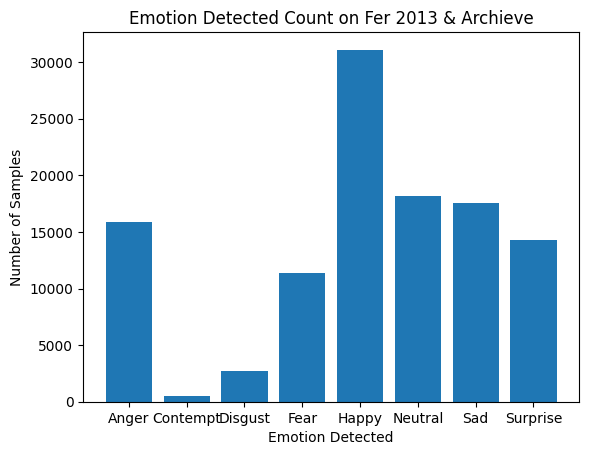

In [205]:
plotimbalance(emotion_csv, "Emotion Detected", "Emotion Detected Count on Fer 2013 & Archieve")

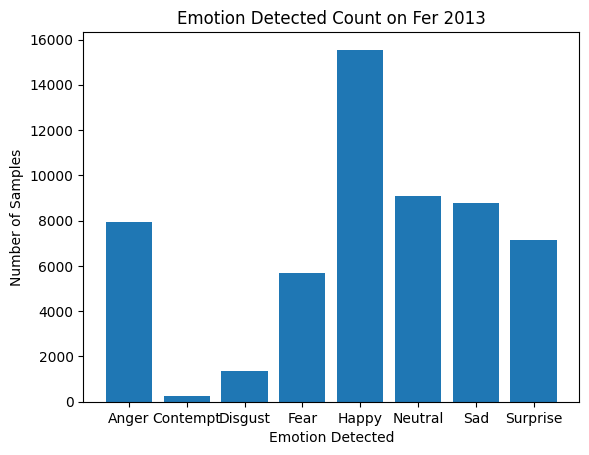

In [206]:
plotimbalance(emotion_fer, "Emotion Detected", "Emotion Detected Count on Fer 2013")

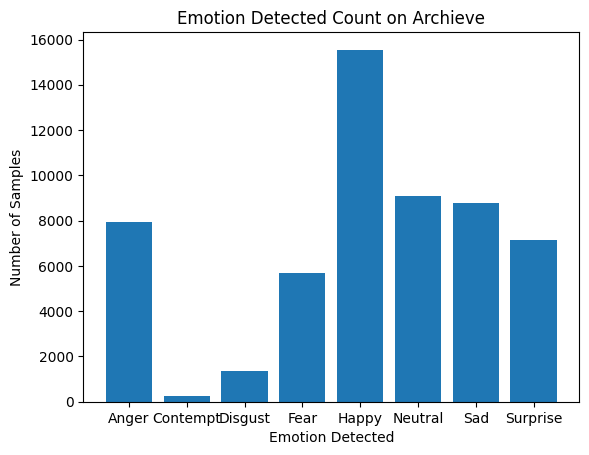

In [207]:
plotimbalance(emotion_archieve, "Emotion Detected", "Emotion Detected Count on Archieve")

In [208]:
# Replace each emotion with a number value
replace_list = {"Happy": 1, "Neutral": 2, "Sad":3 , "Anger": 4 , "Surprise": 5 , "Disgust":6 , "Contempt": 7, "Fear": 8}
emotion_csv = emotion_csv.replace(replace_list)
emotion_fer = emotion_fer.replace(replace_list)
emotion_archieve = emotion_archieve.replace(replace_list)

In [209]:
# Remove the emotions that we would not use at the music reccomendation section: Contempt, Disgust, Fear,
emotion_csv = emotion_csv.drop(emotion_csv[emotion_csv['Emotion Detected'] == 7].index)
emotion_csv = emotion_csv.drop(emotion_csv[emotion_csv['Emotion Detected'] == 6].index)
emotion_csv = emotion_csv.drop(emotion_csv[emotion_csv['Emotion Detected'] == 8].index)

emotion_archieve = emotion_archieve.drop(emotion_archieve[emotion_archieve['Emotion Detected'] == 7].index)
emotion_archieve = emotion_archieve.drop(emotion_archieve[emotion_archieve['Emotion Detected'] == 6].index)
emotion_archieve = emotion_archieve.drop(emotion_archieve[emotion_archieve['Emotion Detected'] == 8].index)

emotion_fer = emotion_fer.drop(emotion_fer[emotion_fer['Emotion Detected'] == 7].index)
emotion_fer = emotion_fer.drop(emotion_fer[emotion_fer['Emotion Detected'] == 6].index)
emotion_fer = emotion_fer.drop(emotion_fer[emotion_fer['Emotion Detected'] == 8].index)


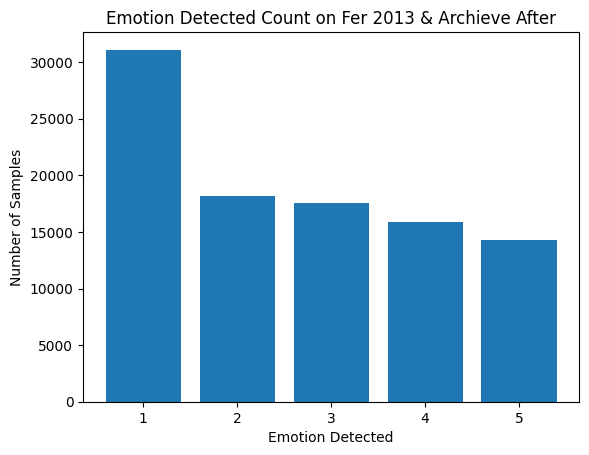

In [210]:
plotimbalance(emotion_csv, "Emotion Detected", "Emotion Detected Count on Fer 2013 & Archieve After")

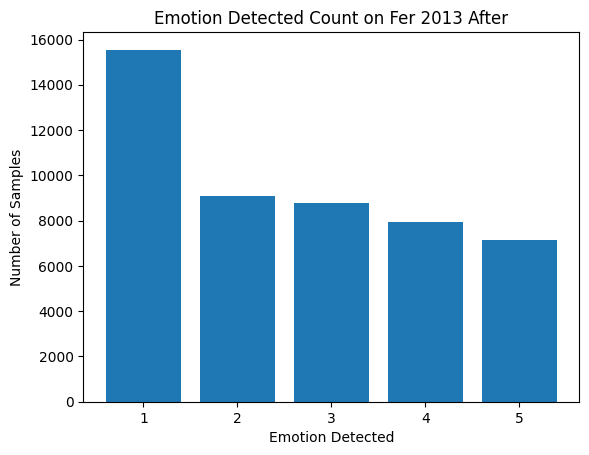

In [211]:
plotimbalance(emotion_fer, "Emotion Detected", "Emotion Detected Count on Fer 2013 After")

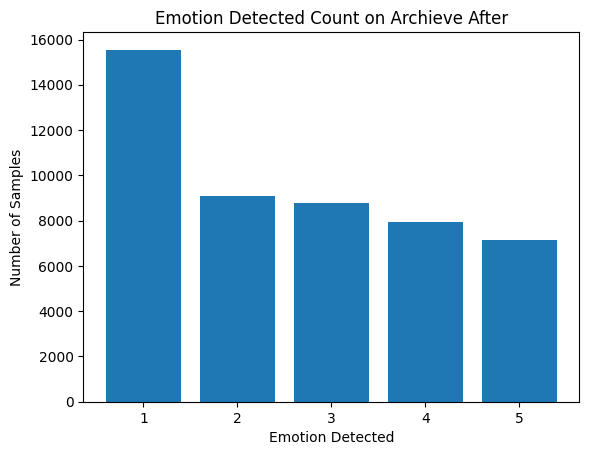

In [212]:
plotimbalance(emotion_archieve, "Emotion Detected", "Emotion Detected Count on Archieve After")

## Feature Selections

In [213]:
# Intensity
intensity_columns = ['AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'Emotion Detected']

emotion_fer_i = emotion_fer[intensity_columns]
emotion_archieve_i = emotion_archieve[intensity_columns]
emotion_csv_i = emotion_csv[intensity_columns]

In [214]:
# Presence
presence_columns = ['AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'Emotion Detected']

emotion_fer_p = emotion_fer[presence_columns]
emotion_archieve_p = emotion_archieve[presence_columns]
emotion_csv_p = emotion_csv[presence_columns]

In [215]:
# Intensity + Presence Combined
c = ['AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c', 
 'AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r', 'Emotion Detected']

emotion_fer = emotion_fer[c]
emotion_archieve = emotion_archieve[c]
emotion_csv = emotion_csv[c]

## Normilization

In [216]:
 # copy the data 
emotion_archieve_p_z = emotion_archieve_p.copy() 

emotion_archieve_p_z_x = emotion_archieve_p_z[['AU01_r',
    'AU02_r',
    'AU04_r',
    'AU05_r',
    'AU06_r',
    'AU07_r',
    'AU09_r',
    'AU10_r',
    'AU12_r',
    'AU14_r',
    'AU15_r',
    'AU17_r',
    'AU20_r',
    'AU23_r',
    'AU25_r',
    'AU26_r',
    'AU45_r']]
    
emotion_archieve_p_z_y = pd.DataFrame(emotion_archieve_p_z['Emotion Detected'])

# create a scaler object
std_scaler = StandardScaler()

emotion_archieve_p_z_x = pd.DataFrame(std_scaler.fit_transform(emotion_archieve_p_z_x), columns=emotion_archieve_p_z_x.columns)
    
emotion_archieve_p_z = pd.concat([emotion_archieve_p_z_x, emotion_archieve_p_z_y], axis=1, join='inner')

In [217]:
 # copy the data 
emotion_fer_p_z = emotion_fer_p.copy() 

emotion_fer_p_z_x = emotion_fer_p_z[['AU01_r',
    'AU02_r',
    'AU04_r',
    'AU05_r',
    'AU06_r',
    'AU07_r',
    'AU09_r',
    'AU10_r',
    'AU12_r',
    'AU14_r',
    'AU15_r',
    'AU17_r',
    'AU20_r',
    'AU23_r',
    'AU25_r',
    'AU26_r',
    'AU45_r']]
    
emotion_fer_p_z_y = pd.DataFrame(emotion_fer_p_z['Emotion Detected'])

# create a scaler object
std_scaler = StandardScaler()

emotion_fer_p_z_x = pd.DataFrame(std_scaler.fit_transform(emotion_fer_p_z_x), columns=emotion_fer_p_z_x.columns)
    
emotion_fer_p_z = pd.concat([emotion_fer_p_z_x, emotion_fer_p_z_y], axis=1, join='inner')

## Training & Testing 

In [218]:
 # Split the new dataframe into training and testing sets for all 3 dataframes
 
x_train_fer_i, x_test_fer_i, y_train_fer_i, y_test_fer_i = train_test_split(emotion_fer_i, emotion_fer["Emotion Detected"], test_size=0.33, random_state=42)

x_train_fer_p, x_test_fer_p, y_train_fer_p, y_test_fer_p = train_test_split(emotion_fer_p, emotion_fer["Emotion Detected"], test_size=0.33, random_state=42)

x_train_fer_ip, x_test_fer_ip, y_train_fer_ip, y_test_fer_ip = train_test_split(emotion_fer, emotion_fer["Emotion Detected"], test_size=0.33, random_state=42)


In [219]:
x_train_achieve_ip, x_test_archieve_ip, y_train_archieve_ip, y_test_archieve_ip = train_test_split(emotion_archieve, emotion_archieve["Emotion Detected"], test_size=0.33, random_state=42)

x_train_achieve_i, x_test_archieve_i, y_train_archieve_i, y_test_archieve_i = train_test_split(emotion_archieve_i, emotion_archieve["Emotion Detected"], test_size=0.33, random_state=42)

x_train_achieve_p, x_test_archieve_p, y_train_archieve_p, y_test_archieve_p = train_test_split(emotion_archieve_p, emotion_archieve["Emotion Detected"], test_size=0.33, random_state=42)

In [220]:
x_train_ip, x_test_ip, y_train_ip, y_test_ip = train_test_split(emotion_csv, emotion_csv["Emotion Detected"], test_size=0.33, random_state=42)

x_train_i, x_test_i, y_train_i, y_test_i = train_test_split(emotion_csv_i, emotion_csv["Emotion Detected"], test_size=0.33, random_state=42)

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(emotion_csv_p, emotion_csv["Emotion Detected"], test_size=0.33, random_state=42)

In [221]:
x_train_archieve_z_p, x_test_archieve_z_p, y_train_archieve_z_p, y_test_archieve_z_p = train_test_split(emotion_archieve_p_z, 
                                                                                                       emotion_archieve_p_z["Emotion Detected"],
                                                                                                       test_size=0.33,
                                                                                                       random_state=42)

x_train_fer_z_p, x_test_fer_z_p, y_train_fer_z_p, y_test_fer_z_p = train_test_split(emotion_fer_p_z, 
                                                                                    emotion_fer_p_z["Emotion Detected"],
                                                                                    test_size=0.33,
                                                                                   random_state=42)

## Undersampling

In [222]:
# Undersample the emotion: Happy with Contempt and Disgust removed
def unsample(x, y, happyvalue):
    
    # 3b. Undersample emotion: Happy in the training dataset
    sampling_strategy = {1: happyvalue}
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
    X_res, y_res = rus.fit_resample(x, y)
    
    # print(X_res["Emotion Detected"].value_counts()
    
    # Remove the Emotion Detected Column in the X_res
    X_res.drop(columns="Emotion Detected")
    
    return X_res, y_res

In [223]:
# Apply the undersample function
x_under_fer_p, y_under_fer_p = unsample(x_train_fer_p, y_train_fer_p, 6000)
x_under_fer_i, y_under_fer_i = unsample(x_train_fer_i, y_train_fer_i,6000 )
x_under_fer_i_p, y_under_fer_i_p = unsample(x_train_fer_ip, y_train_fer_ip,6000 )

x_under_archieve_p, y_under_archieve_p = unsample(x_train_achieve_p, y_train_archieve_p, 6000 )
x_under_archieve_i, y_under_archieve_i = unsample(x_train_achieve_i, y_train_archieve_i, 6000)
x_under_archieve_i_p, y_under_archieve_i_p = unsample(x_train_achieve_ip, y_train_archieve_ip, 6000)

x_under_p, y_under_p = unsample(x_train_p, y_train_p, 15000)
x_under_i, y_under_i = unsample(x_train_i, y_train_i,15000 )
x_under_ip, y_under_ip = unsample(x_train_ip, y_train_ip, 15000 )

x_under_fer_p_z, y_under_fer_p_z = unsample(x_train_fer_z_p, y_train_fer_z_p, 6000)

x_under_archieve_p_z, y_under_archieve_p_z = unsample(x_train_archieve_z_p, y_train_archieve_z_p, 6000 )

In [224]:
# Drop Emotion Detected: x-training
x_under_fer_p = x_under_fer_p.drop(columns='Emotion Detected')
x_under_fer_i = x_under_fer_i.drop(columns='Emotion Detected')
x_under_fer_i_p = x_under_fer_i_p.drop(columns='Emotion Detected')

x_under_archieve_p = x_under_archieve_p.drop(columns='Emotion Detected')
x_under_archieve_i = x_under_archieve_i.drop(columns='Emotion Detected')
x_under_archieve_i_p = x_under_archieve_i_p.drop(columns='Emotion Detected')

x_under_p = x_under_p.drop(columns='Emotion Detected')
x_under_i = x_under_i.drop(columns='Emotion Detected')
x_under_ip = x_under_ip.drop(columns='Emotion Detected')

x_under_fer_p_z = x_under_fer_p_z.drop(columns='Emotion Detected')
x_under_archieve_p_z = x_under_archieve_p_z.drop(columns='Emotion Detected')

In [225]:
# Drop Emotion Detected: x-testing
x_test_fer_i = x_test_fer_i.drop(columns='Emotion Detected')
x_test_fer_p = x_test_fer_p.drop(columns='Emotion Detected')
x_test_fer_ip = x_test_fer_ip.drop(columns='Emotion Detected')

x_test_archieve_i = x_test_archieve_i.drop(columns='Emotion Detected')
x_test_archieve_p = x_test_archieve_p.drop(columns='Emotion Detected')
x_test_archieve_ip = x_test_archieve_ip.drop(columns='Emotion Detected')

x_test_i = x_test_i.drop(columns='Emotion Detected')
x_test_p = x_test_p.drop(columns='Emotion Detected')
x_test_ip = x_test_ip.drop(columns='Emotion Detected')

x_test_archieve_z_p = x_test_archieve_z_p.drop(columns='Emotion Detected')
x_test_fer_z_p = x_test_fer_z_p.drop(columns='Emotion Detected')


## Models

### SVM RBF

In [226]:
svm_rbf = svm.SVC(kernel="rbf",
                  C = 10,
                  gamma = 0.1)

In [227]:
# Fer Dataset 
svm_rbf_fer_p = svm_rbf.fit(x_under_fer_p, y_under_fer_p)
svm_y_fer_p = svm_rbf_fer_p.predict(x_test_fer_p)

svm_rbf_fer_i = svm_rbf.fit(x_under_fer_i, y_under_fer_i)
svm_y_fer_i = svm_rbf_fer_i.predict(x_test_fer_i)

svm_rbf_fer_ip = svm_rbf.fit(x_under_fer_i_p, y_under_fer_i_p)
svm_y_fer_ip = svm_rbf_fer_ip.predict(x_test_fer_ip)

In [228]:
# Archieve Dataset
svm_rbf_archieve_p = svm_rbf.fit(x_under_archieve_p, y_under_archieve_p)
svm_y_archieve_p = svm_rbf_archieve_p.predict(x_test_archieve_p)

svm_rbf_archieve_i = svm_rbf.fit(x_under_archieve_i, y_under_archieve_i)
svm_y_archieve_i = svm_rbf_archieve_i.predict(x_test_archieve_i)

svm_rbf_archieve_ip = svm_rbf.fit(x_under_archieve_i_p, y_under_archieve_i_p)
svm_y_archieve_ip = svm_rbf_archieve_ip.predict(x_test_archieve_ip)

In [229]:
# Both
svm_rbf_p = svm_rbf.fit(x_under_p, y_under_p)
svm_y_p = svm_rbf_p.predict(x_test_p)

svm_rbf_i = svm_rbf.fit(x_under_fer_i, y_under_fer_i)
svm_y_i = svm_rbf_fer_i.predict(x_test_fer_i)

svm_rbf_ip = svm_rbf.fit(x_under_ip, y_under_ip)
svm_y_ip = svm_rbf_ip.predict(x_test_ip)

In [230]:
# Z-Normilization 
svm_rbf_p_z = svm_rbf.fit(x_under_fer_p_z, y_under_fer_p_z)
svm_y_p_fer_z = svm_rbf_p_z.predict(x_test_fer_z_p)

svm_rbf_p_z_a = svm_rbf.fit(x_under_archieve_p_z, y_under_archieve_p_z)
svm_y_p_archieve_z = svm_rbf_p_z_a.predict(x_test_archieve_z_p)

### SVM Linear

In [231]:
svm_linear = LinearSVC(C = 10)

In [232]:
# Fer Dataset 
s1 = svm_linear.fit(x_under_fer_p, y_under_fer_p)
svm_linear_y_fer_p = s1.predict(x_test_fer_p)

s2 = svm_linear.fit(x_under_fer_i, y_under_fer_i)
svm_linear_y_fer_i = s2.predict(x_test_fer_i)

s3 = svm_linear.fit(x_under_fer_i_p, y_under_fer_i_p)
svm_linear_y_fer_ip = s3.predict(x_test_fer_ip)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [233]:
# Archieve Dataset
s5 = svm_linear.fit(x_under_archieve_p, y_under_archieve_p)
svm_linear_y_archieve_p = s5.predict(x_test_archieve_p)

s6 = svm_linear.fit(x_under_archieve_i, y_under_archieve_i)
svm_linear_y_archieve_i = s6.predict(x_test_archieve_i)

s7 = svm_linear.fit(x_under_archieve_i_p, y_under_archieve_i_p)
svm_linear_y_archieve_ip = s7.predict(x_test_archieve_ip)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [234]:
# Both
s8 = svm_linear.fit(x_under_p, y_under_p)
svm_y_l_p = s8.predict(x_test_p)

s9 = svm_linear.fit(x_under_fer_i, y_under_fer_i)
svm_y_l_i = s9.predict(x_test_fer_i)

s10 = svm_linear.fit(x_under_ip, y_under_ip)
svm_y_linear_ip = s10.predict(x_test_ip)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [235]:
# Z-Normilization 
s11 = svm_linear.fit(x_under_fer_p_z, y_under_fer_p_z)
svm_y_p_fer_linear_z = s11.predict(x_test_fer_z_p)

s12 = svm_linear.fit(x_under_archieve_p_z, y_under_archieve_p_z)
svm_y_p_archieve_linear_z = s12.predict(x_test_archieve_z_p)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Random Forest

In [236]:
# Random Forest Model with the best parameters
rf = RandomForestClassifier(max_features= 'sqrt', 
                            min_samples_leaf= 75,
                            n_estimators= 100)

In [237]:
rf_fer_p = rf.fit(x_under_fer_p, y_under_fer_p)
rf_fer_y_p = rf_fer_p.predict(x_test_fer_p)

rf_fer_i = rf.fit(x_under_fer_i, y_under_fer_i)
rf_fer_y_i = rf_fer_i.predict(x_test_fer_i)

rf_fer_ip = rf.fit(x_under_fer_i_p, y_under_fer_i_p)
rf_fer_y_ip = rf_fer_ip.predict(x_test_fer_ip)

In [238]:
# Archieve Dataset
rf_archieve_p = rf.fit(x_under_archieve_p, y_under_archieve_p)
rf_archieve_p_y = rf_archieve_p.predict(x_test_archieve_p)

rf_archieve_i = rf.fit(x_under_archieve_i, y_under_archieve_i)
rf_archieve_i_y = rf_archieve_i.predict(x_test_archieve_i)

rf_archieve_ip = rf.fit(x_under_archieve_i_p, y_under_archieve_i_p)
rf_archieve_ip_y = rf_archieve_ip.predict(x_test_archieve_ip)

In [239]:
# Both
rf_p = rf.fit(x_under_p, y_under_p)
rf_y_p = rf_p.predict(x_test_p)

rf_i = rf.fit(x_under_fer_i, y_under_fer_i)
rf_i_y = rf_i.predict(x_test_fer_i)

rf_ip = rf.fit(x_under_ip, y_under_ip)
rf_ip_y = rf_ip.predict(x_test_ip)

In [240]:
# Z-Normilization 
rf_f_p_z = rf.fit(x_under_fer_p_z, y_under_fer_p_z)
rf_fer_p_z = rf_f_p_z.predict(x_test_fer_z_p)

rf_a_p_z = rf.fit(x_under_archieve_p_z, y_under_archieve_p_z)
rf_a_p_z = rf_a_p_z.predict(x_test_archieve_z_p)

### Naive Bayes: Contempt

In [241]:
# Complement NB
cnb = ComplementNB(alpha=1)

In [242]:
# Fer Dataset 

cnb_fer_p = cnb.fit(x_under_fer_p, y_under_fer_p)
cnb_fer_p_y = cnb_fer_p.predict(x_test_fer_p)

cnb_fer_i = cnb.fit(x_under_fer_i, y_under_fer_i)
cnb_fer_i_y = cnb_fer_i.predict(x_test_fer_i)

cnb_fer_ip = cnb.fit(x_under_fer_i_p, y_under_fer_i_p)
cnb_fer_ip_y = cnb_fer_ip.predict(x_test_fer_ip)

In [243]:
# Archieve Dataset
cnb_archieve_p = cnb.fit(x_under_archieve_p, y_under_archieve_p)
cnb_archieve_p_y = cnb_archieve_p.predict(x_test_archieve_p)

cnb_archieve_i = cnb.fit(x_under_archieve_i, y_under_archieve_i)
cnb_archieve_i_y = cnb_archieve_i.predict(x_test_archieve_i)

cnb_archieve_ip = cnb.fit(x_under_archieve_i_p, y_under_archieve_i_p)
cnb_archieve_ip_y = cnb_archieve_ip.predict(x_test_archieve_ip)

In [244]:
# Both
cnb_p = cnb.fit(x_under_p, y_under_p)
cnb_p_y = cnb_p.predict(x_test_p)

cnb_i = cnb.fit(x_under_fer_i, y_under_fer_i)
cnb_i_y = cnb_i.predict(x_test_fer_i)

cnb_ip = cnb.fit(x_under_ip, y_under_ip)
cnb_ip_y = cnb_ip.predict(x_test_ip)

### Naive Bayes: Guasssin

In [245]:
# Gaussian NB
gnd = GaussianNB()

In [246]:
# Fer Dataset 

gnd_fer_p = gnd.fit(x_under_fer_p, y_under_fer_p)
gnd_fer_p_y = gnd_fer_p.predict(x_test_fer_p)

gnd_fer_i = gnd.fit(x_under_fer_i, y_under_fer_i)
gnd_fer_i_y = gnd_fer_i.predict(x_test_fer_i)

gnd_fer_ip = gnd.fit(x_under_fer_i_p, y_under_fer_i_p)
gnd_fer_ip_y = gnd_fer_ip.predict(x_test_fer_ip)

In [247]:
# Archieve Dataset
gnd_archieve_p = gnd.fit(x_under_archieve_p, y_under_archieve_p)
gnd_archieve_p_y = gnd_archieve_p.predict(x_test_archieve_p)

gnd_archieve_i = gnd.fit(x_under_archieve_i, y_under_archieve_i)
gnd_archieve_i_y = gnd_archieve_i.predict(x_test_archieve_i)

gnd_archieve_ip = gnd.fit(x_under_archieve_i_p, y_under_archieve_i_p)
gnd_archieve_ip_y = gnd_archieve_ip.predict(x_test_archieve_ip)

In [248]:
# Both
gnd_p = gnd.fit(x_under_p, y_under_p)
gnd_p_y = gnd_p.predict(x_test_p)

gnd_i = gnd.fit(x_under_fer_i, y_under_fer_i)
gnd_i_y = gnd_i.predict(x_test_fer_i)

gnd_ip = gnd.fit(x_under_ip, y_under_ip)
gnd_ip_y = gnd_ip.predict(x_test_ip)

In [249]:
# Z-Normilization 
gnd_f_p_z = gnd.fit(x_under_fer_p_z, y_under_fer_p_z)
gnd_fer_p_z = gnd_f_p_z.predict(x_test_fer_z_p)

gnd_a_p_z = gnd.fit(x_under_archieve_p_z, y_under_archieve_p_z)
gnd_a_p_z = gnd_a_p_z.predict(x_test_archieve_z_p)

### Decision Tree

In [250]:
# Decision Tree Model
tree = DecisionTreeClassifier(splitter="best",
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1)

In [251]:
# Fer Dataset 

tree_fer_p = tree.fit(x_under_fer_p, y_under_fer_p)
tree_fer_p_y = tree_fer_p.predict(x_test_fer_p)

tree_fer_i = tree.fit(x_under_fer_i, y_under_fer_i)
tree_fer_i_y = tree_fer_i.predict(x_test_fer_i)

tree_fer_ip = tree.fit(x_under_fer_i_p, y_under_fer_i_p)
tree_fer_ip_y = tree_fer_ip.predict(x_test_fer_ip)

In [252]:
# Archieve Dataset
tree_archieve_p = tree.fit(x_under_archieve_p, y_under_archieve_p)
tree_archieve_p_y = tree_archieve_p.predict(x_test_archieve_p)

tree_archieve_i = tree.fit(x_under_archieve_i, y_under_archieve_i)
tree_archieve_i_y = tree_archieve_i.predict(x_test_archieve_i)

tree_archieve_ip = tree.fit(x_under_archieve_i_p, y_under_archieve_i_p)
tree_archieve_ip_y = tree_archieve_ip.predict(x_test_archieve_ip)

In [253]:
# Both
tree_p = tree.fit(x_under_p, y_under_p)
tree_p_y = tree_p.predict(x_test_p)

tree_i = tree.fit(x_under_fer_i, y_under_fer_i)
tree_i_y = tree_i.predict(x_test_fer_i)

tree_ip = tree.fit(x_under_ip, y_under_ip)
tree_ip_y = tree_ip.predict(x_test_ip)

In [254]:
# Z-Normilization 
tree_f_p_z = tree.fit(x_under_fer_p_z, y_under_fer_p_z)
tree_fer_p_z = tree_f_p_z.predict(x_test_fer_z_p)

tree_a_p_z = tree.fit(x_under_archieve_p_z, y_under_archieve_p_z)
tree_a_p_z = tree_a_p_z.predict(x_test_archieve_z_p)

## Reports

In [255]:
def metics_reports(y_label_training, y_label_prediction):
    
    # Accuracy Score Prediciton 
    print("Accurary Score")
    print(accuracy_score(y_label_training, y_label_prediction))
    
    #F1 Score
    print("F1 Score")
    print(f1_score(y_label_training, y_label_prediction, average='macro'))
    
    # Classification Report
    print("Classification Report")
    print(classification_report(y_label_training, y_label_prediction))

In [256]:
import seaborn as sns
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [257]:
def CMplot(testing, svm_training, svm_linear,
           rf_training,
           con_training,
           gu_training,
           tree_training):
    
    labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    categories = ['Happy', 'Neutral', 'Sad', 'Anger', 'Surprise' ]
    
    # Confusion Matrix Prediciton 
    cm = confusion_matrix(testing, svm_training)
    make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',
                      cbar = False, title="SVM")
    
    cm1 = confusion_matrix(testing, svm_linear)
    make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',
                      cbar = False, title="SVM Linear")
    
    # Confusion Matrix Prediciton 
    cm2 = confusion_matrix(testing, rf_training)
    make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',
                      cbar = False, title="Random Forest")
 
    
    # Confusion Matrix Prediciton 
    cm3 = confusion_matrix(testing, con_training)
    make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',
                      cbar = False, title="CNB Naive Bayes")
    
     # Confusion Matrix Prediciton 
    cm4 = confusion_matrix(testing, gu_training)
    make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',
                      cbar = False, title="Naive Bayes GNB")
    
     # Confusion Matrix Prediciton 
    cm5 = confusion_matrix(testing, tree_training)
    make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',
                      cbar = False, title="Decision Tree")

### Fer 2013 Presence
- Best Performance: SVM Model
- Worst Performance: Naive Bayes CNB

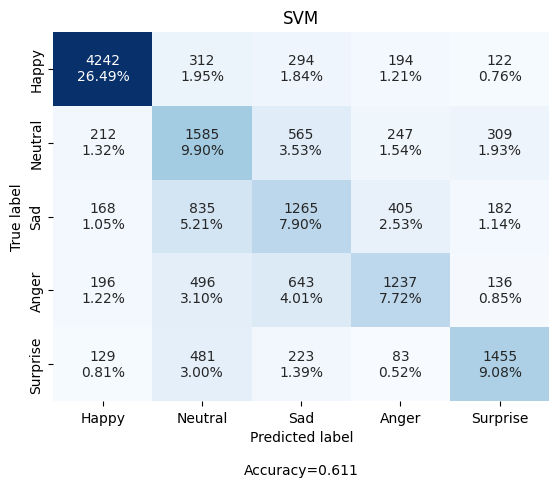

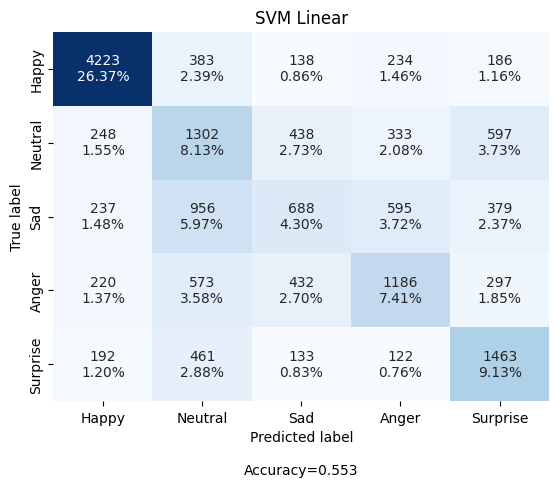

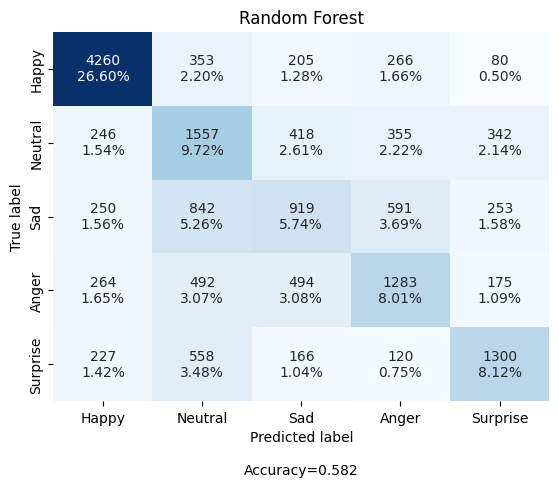

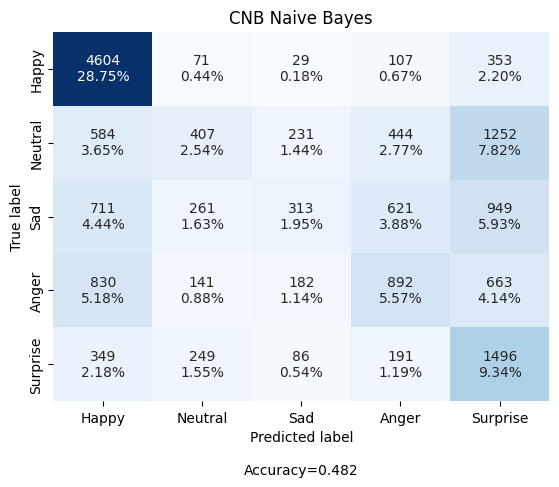

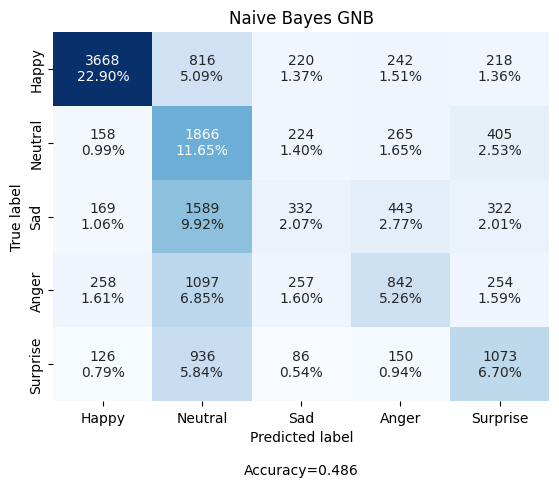

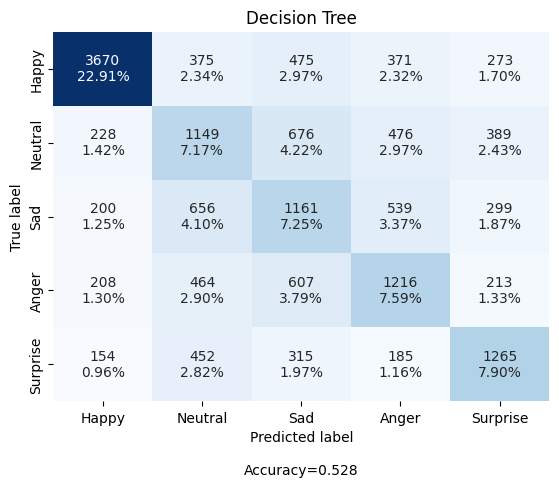

In [258]:
CMplot(y_test_fer_p, svm_y_fer_p, svm_linear_y_fer_p,
       rf_fer_y_p, cnb_fer_p_y, gnd_fer_p_y, tree_fer_p_y)

In [259]:
metics_reports(y_test_fer_p, svm_y_fer_p)

Accurary Score
0.6108891108891109
F1 Score
0.5787875533082091
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.82      0.84      5164
           2       0.43      0.54      0.48      2918
           3       0.42      0.44      0.43      2855
           4       0.57      0.46      0.51      2708
           5       0.66      0.61      0.64      2371

    accuracy                           0.61     16016
   macro avg       0.59      0.58      0.58     16016
weighted avg       0.62      0.61      0.61     16016



In [260]:
metics_reports(y_test_fer_p, svm_linear_y_fer_p)

Accurary Score
0.5533216783216783
F1 Score
0.5041807311902542
Classification Report
              precision    recall  f1-score   support

           1       0.82      0.82      0.82      5164
           2       0.35      0.45      0.39      2918
           3       0.38      0.24      0.29      2855
           4       0.48      0.44      0.46      2708
           5       0.50      0.62      0.55      2371

    accuracy                           0.55     16016
   macro avg       0.51      0.51      0.50     16016
weighted avg       0.55      0.55      0.55     16016



In [261]:
metics_reports(y_test_fer_p, rf_fer_y_p)

Accurary Score
0.5818556443556444
F1 Score
0.5404735275336667
Classification Report
              precision    recall  f1-score   support

           1       0.81      0.82      0.82      5164
           2       0.41      0.53      0.46      2918
           3       0.42      0.32      0.36      2855
           4       0.49      0.47      0.48      2708
           5       0.60      0.55      0.58      2371

    accuracy                           0.58     16016
   macro avg       0.55      0.54      0.54     16016
weighted avg       0.58      0.58      0.58     16016



In [262]:
metics_reports(y_test_fer_p, cnb_fer_p_y)

Accurary Score
0.48151848151848153
F1 Score
0.380898774050263
Classification Report
              precision    recall  f1-score   support

           1       0.65      0.89      0.75      5164
           2       0.36      0.14      0.20      2918
           3       0.37      0.11      0.17      2855
           4       0.40      0.33      0.36      2708
           5       0.32      0.63      0.42      2371

    accuracy                           0.48     16016
   macro avg       0.42      0.42      0.38     16016
weighted avg       0.46      0.48      0.43     16016



In [263]:
metics_reports(y_test_fer_p, gnd_fer_p_y)

Accurary Score
0.48582667332667334
F1 Score
0.4329706434620248
Classification Report
              precision    recall  f1-score   support

           1       0.84      0.71      0.77      5164
           2       0.30      0.64      0.40      2918
           3       0.30      0.12      0.17      2855
           4       0.43      0.31      0.36      2708
           5       0.47      0.45      0.46      2371

    accuracy                           0.49     16016
   macro avg       0.47      0.45      0.43     16016
weighted avg       0.52      0.49      0.48     16016



In [264]:
metics_reports(y_test_fer_p, tree_fer_p_y)

Accurary Score
0.5282842157842158
F1 Score
0.4989400309970112
Classification Report
              precision    recall  f1-score   support

           1       0.82      0.71      0.76      5164
           2       0.37      0.39      0.38      2918
           3       0.36      0.41      0.38      2855
           4       0.44      0.45      0.44      2708
           5       0.52      0.53      0.53      2371

    accuracy                           0.53     16016
   macro avg       0.50      0.50      0.50     16016
weighted avg       0.55      0.53      0.54     16016



### Fer 2013 Persence Normalized
- Best Model: SVM
- Worst Model: Naivyes Bayes Guassin

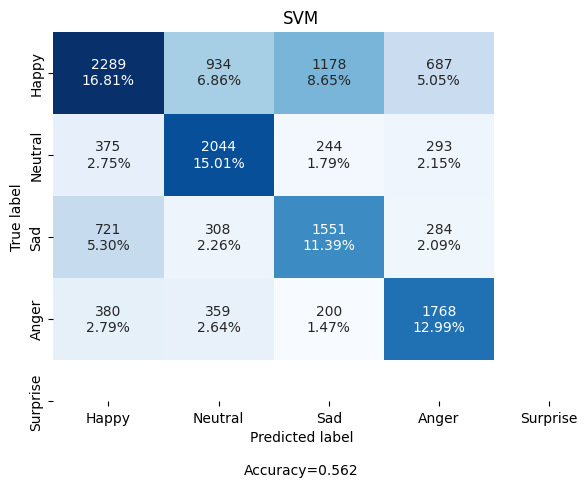

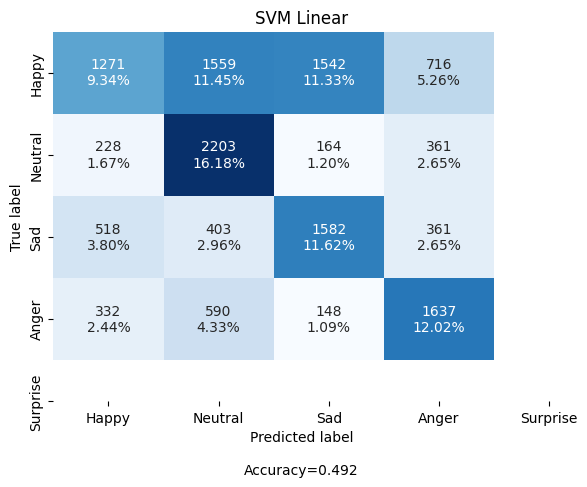

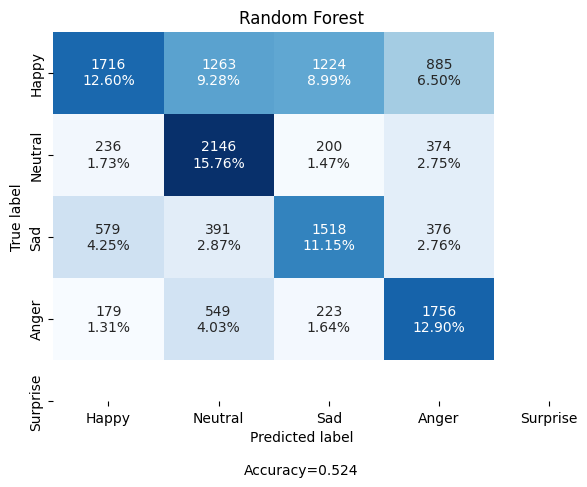

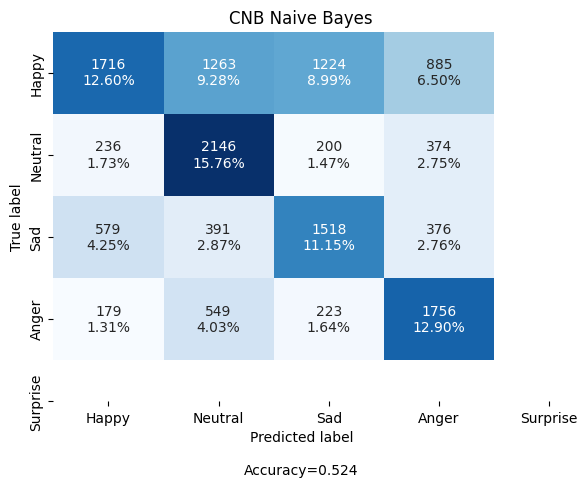

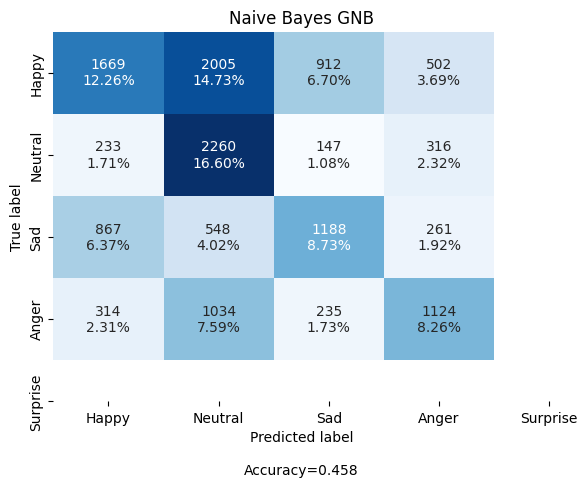

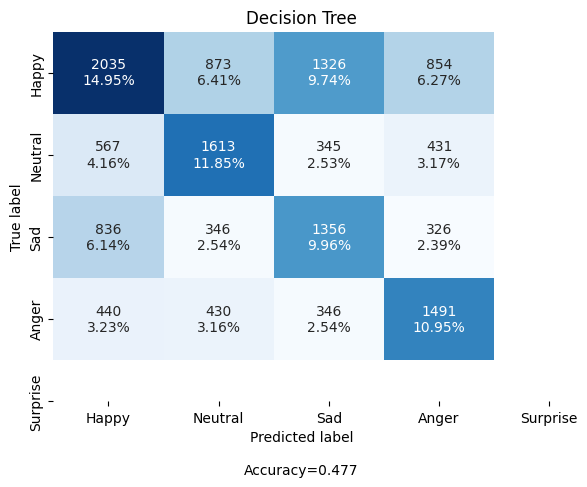

In [265]:
CMplot(y_test_fer_z_p, svm_y_p_fer_z,  svm_y_p_fer_linear_z,
       rf_fer_p_z, rf_fer_p_z, gnd_fer_p_z,tree_fer_p_z)

# No Naive Bayes Contempt

In [266]:
metics_reports(y_test_fer_z_p, svm_y_p_fer_z)

Accurary Score
0.5620271759089239
F1 Score
0.5665948843853661
Classification Report
              precision    recall  f1-score   support

           1       0.61      0.45      0.52      5088
           2       0.56      0.69      0.62      2956
           3       0.49      0.54      0.51      2864
           4       0.58      0.65      0.62      2707

    accuracy                           0.56     13615
   macro avg       0.56      0.58      0.57     13615
weighted avg       0.57      0.56      0.56     13615



In [267]:
metics_reports(y_test_fer_z_p, svm_y_p_fer_linear_z)

Accurary Score
0.49159015791406535
F1 Score
0.4954145718085986
Classification Report
              precision    recall  f1-score   support

           1       0.54      0.25      0.34      5088
           2       0.46      0.75      0.57      2956
           3       0.46      0.55      0.50      2864
           4       0.53      0.60      0.57      2707

    accuracy                           0.49     13615
   macro avg       0.50      0.54      0.50     13615
weighted avg       0.51      0.49      0.47     13615



In [268]:
metics_reports(y_test_fer_z_p, rf_fer_p_z)

Accurary Score
0.5241278002203452
F1 Score
0.5267870647134026
Classification Report
              precision    recall  f1-score   support

           1       0.63      0.34      0.44      5088
           2       0.49      0.73      0.59      2956
           3       0.48      0.53      0.50      2864
           4       0.52      0.65      0.58      2707

    accuracy                           0.52     13615
   macro avg       0.53      0.56      0.53     13615
weighted avg       0.55      0.52      0.51     13615



In [269]:
metics_reports(y_test_fer_z_p, gnd_fer_p_z)

Accurary Score
0.4583914799853103
F1 Score
0.456066208560136
Classification Report
              precision    recall  f1-score   support

           1       0.54      0.33      0.41      5088
           2       0.39      0.76      0.51      2956
           3       0.48      0.41      0.44      2864
           4       0.51      0.42      0.46      2707

    accuracy                           0.46     13615
   macro avg       0.48      0.48      0.46     13615
weighted avg       0.49      0.46      0.45     13615



In [270]:
metics_reports(y_test_fer_z_p, tree_fer_p_z)

Accurary Score
0.47704737421961074
F1 Score
0.480229809255722
Classification Report
              precision    recall  f1-score   support

           1       0.52      0.40      0.45      5088
           2       0.49      0.55      0.52      2956
           3       0.40      0.47      0.43      2864
           4       0.48      0.55      0.51      2707

    accuracy                           0.48     13615
   macro avg       0.48      0.49      0.48     13615
weighted avg       0.48      0.48      0.48     13615



### Fer 2013 Intensity 
- Best Model: SVM
- Worst Model: CNB

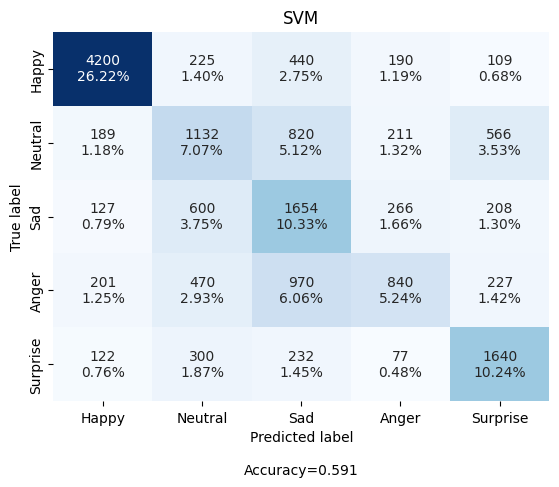

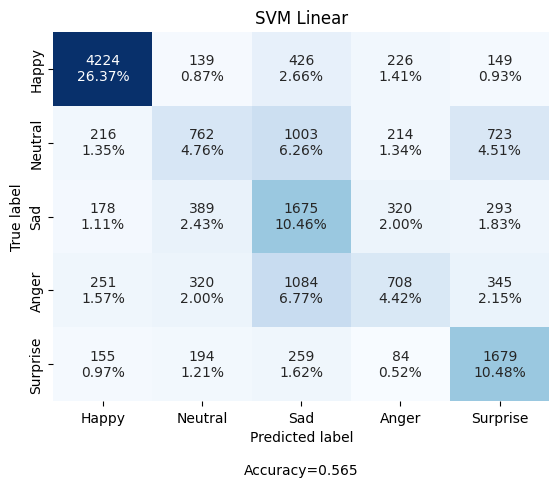

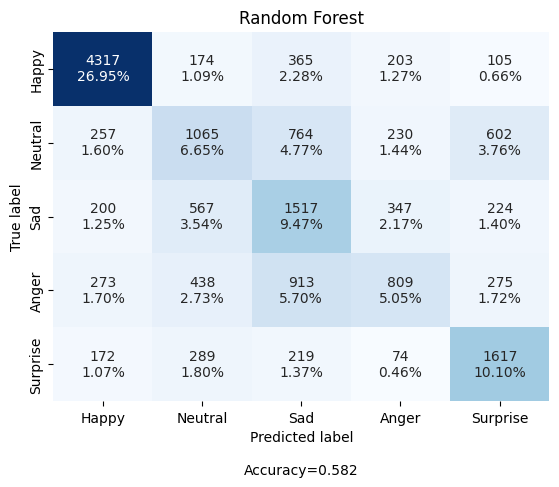

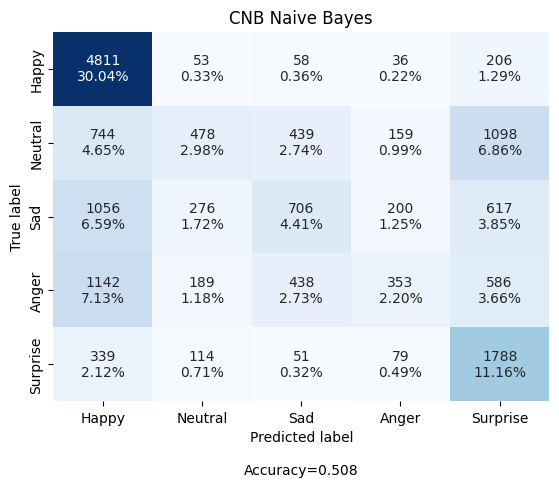

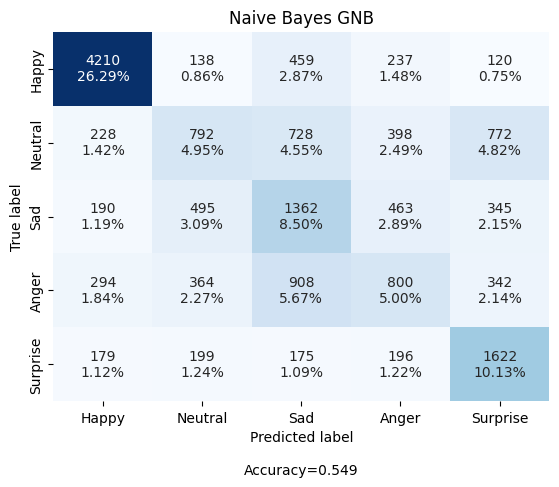

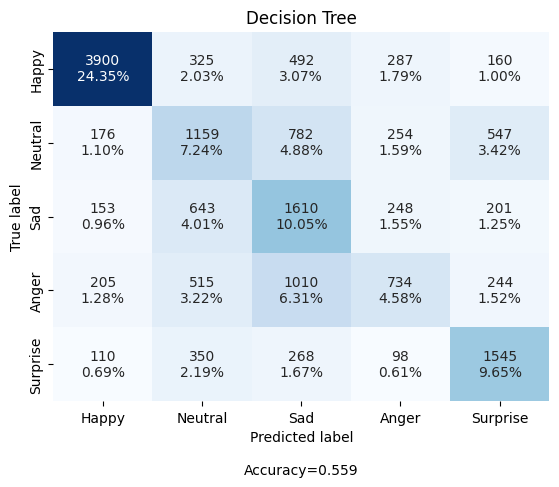

In [271]:
CMplot(y_test_fer_i, svm_y_fer_i,  svm_linear_y_fer_i,
       rf_fer_y_i, cnb_fer_i_y, gnd_fer_i_y, tree_fer_i_y)

In [272]:
metics_reports(y_test_fer_i, svm_y_fer_i)

Accurary Score
0.5910339660339661
F1 Score
0.5494548286438131
Classification Report
              precision    recall  f1-score   support

           1       0.87      0.81      0.84      5164
           2       0.42      0.39      0.40      2918
           3       0.40      0.58      0.47      2855
           4       0.53      0.31      0.39      2708
           5       0.60      0.69      0.64      2371

    accuracy                           0.59     16016
   macro avg       0.56      0.56      0.55     16016
weighted avg       0.61      0.59      0.59     16016



In [273]:
metics_reports(y_test_fer_i, svm_linear_y_fer_i)

Accurary Score
0.564935064935065
F1 Score
0.5094170107250984
Classification Report
              precision    recall  f1-score   support

           1       0.84      0.82      0.83      5164
           2       0.42      0.26      0.32      2918
           3       0.38      0.59      0.46      2855
           4       0.46      0.26      0.33      2708
           5       0.53      0.71      0.60      2371

    accuracy                           0.56     16016
   macro avg       0.52      0.53      0.51     16016
weighted avg       0.57      0.56      0.55     16016



In [274]:
metics_reports(y_test_fer_i, rf_fer_y_i)

Accurary Score
0.5822302697302697
F1 Score
0.5345048008301945
Classification Report
              precision    recall  f1-score   support

           1       0.83      0.84      0.83      5164
           2       0.42      0.36      0.39      2918
           3       0.40      0.53      0.46      2855
           4       0.49      0.30      0.37      2708
           5       0.57      0.68      0.62      2371

    accuracy                           0.58     16016
   macro avg       0.54      0.54      0.53     16016
weighted avg       0.58      0.58      0.58     16016



In [275]:
metics_reports(y_test_fer_i, cnb_fer_i_y)

Accurary Score
0.5079920079920079
F1 Score
0.40198075915075177
Classification Report
              precision    recall  f1-score   support

           1       0.59      0.93      0.73      5164
           2       0.43      0.16      0.24      2918
           3       0.42      0.25      0.31      2855
           4       0.43      0.13      0.20      2708
           5       0.42      0.75      0.54      2371

    accuracy                           0.51     16016
   macro avg       0.46      0.45      0.40     16016
weighted avg       0.48      0.51      0.45     16016



In [276]:
metics_reports(y_test_fer_i, gnd_fer_i_y)

Accurary Score
0.5485764235764236
F1 Score
0.49568818830499384
Classification Report
              precision    recall  f1-score   support

           1       0.83      0.82      0.82      5164
           2       0.40      0.27      0.32      2918
           3       0.38      0.48      0.42      2855
           4       0.38      0.30      0.33      2708
           5       0.51      0.68      0.58      2371

    accuracy                           0.55     16016
   macro avg       0.50      0.51      0.50     16016
weighted avg       0.55      0.55      0.54     16016



In [277]:
metics_reports(y_test_fer_i, tree_fer_i_y)

Accurary Score
0.5586913086913087
F1 Score
0.5206759038862068
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.76      0.80      5164
           2       0.39      0.40      0.39      2918
           3       0.39      0.56      0.46      2855
           4       0.45      0.27      0.34      2708
           5       0.57      0.65      0.61      2371

    accuracy                           0.56     16016
   macro avg       0.53      0.53      0.52     16016
weighted avg       0.58      0.56      0.56     16016



### Fer 2013 Persence + Intensity 
- Best Model: SVM, RF
- Worst Model: CNB

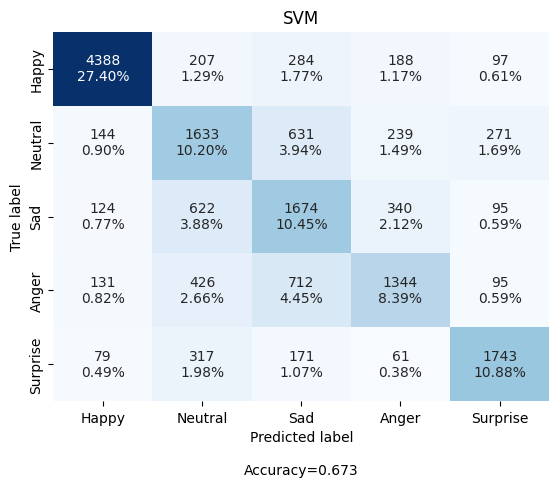

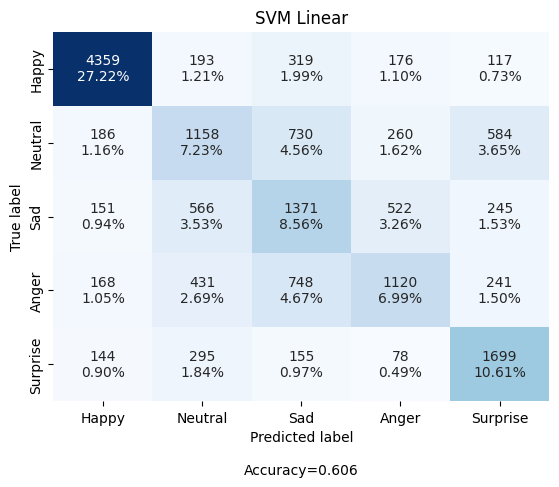

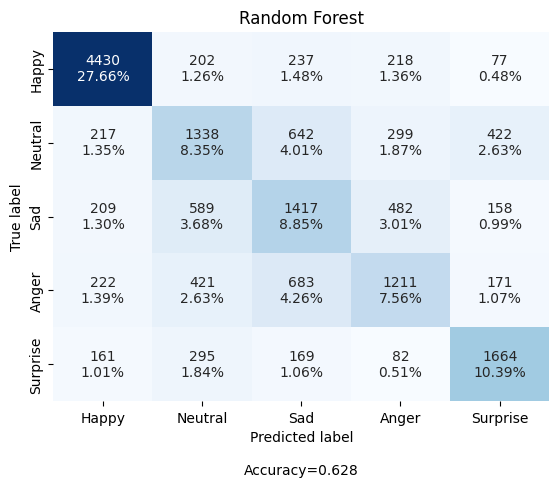

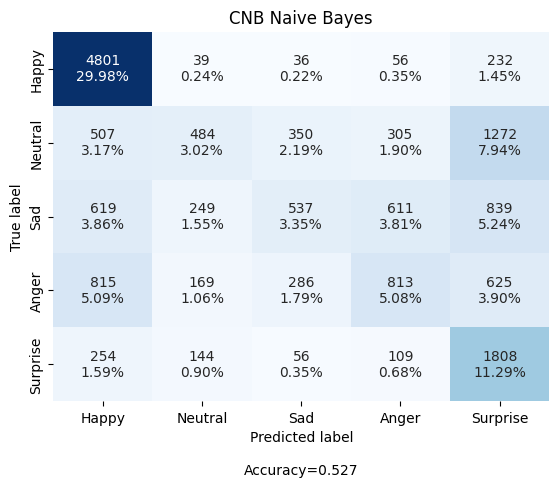

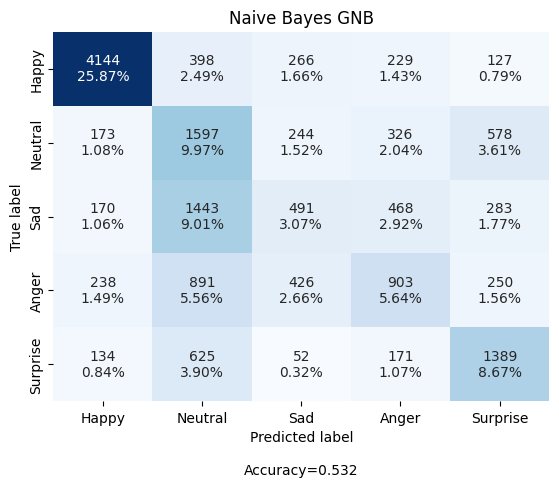

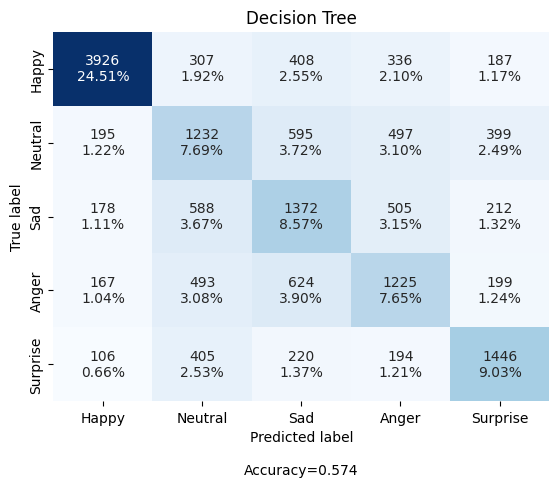

In [278]:
CMplot( y_test_fer_ip, svm_y_fer_ip, svm_linear_y_fer_ip,
       rf_fer_y_ip, cnb_fer_ip_y, gnd_fer_ip_y, tree_fer_ip_y)

In [279]:
metics_reports(y_test_fer_ip, svm_y_fer_ip)

Accurary Score
0.6732017982017982
F1 Score
0.646900281531009
Classification Report
              precision    recall  f1-score   support

           1       0.90      0.85      0.87      5164
           2       0.51      0.56      0.53      2918
           3       0.48      0.59      0.53      2855
           4       0.62      0.50      0.55      2708
           5       0.76      0.74      0.75      2371

    accuracy                           0.67     16016
   macro avg       0.65      0.65      0.65     16016
weighted avg       0.69      0.67      0.68     16016



In [280]:
metics_reports(y_test_fer_ip, svm_linear_y_fer_ip)

Accurary Score
0.6060814185814186
F1 Score
0.5648531962913013
Classification Report
              precision    recall  f1-score   support

           1       0.87      0.84      0.86      5164
           2       0.44      0.40      0.42      2918
           3       0.41      0.48      0.44      2855
           4       0.52      0.41      0.46      2708
           5       0.59      0.72      0.65      2371

    accuracy                           0.61     16016
   macro avg       0.57      0.57      0.56     16016
weighted avg       0.61      0.61      0.60     16016



In [281]:
metics_reports(y_test_fer_ip, rf_fer_y_ip)

Accurary Score
0.6281218781218781
F1 Score
0.5913734795546516
Classification Report
              precision    recall  f1-score   support

           1       0.85      0.86      0.85      5164
           2       0.47      0.46      0.46      2918
           3       0.45      0.50      0.47      2855
           4       0.53      0.45      0.48      2708
           5       0.67      0.70      0.68      2371

    accuracy                           0.63     16016
   macro avg       0.59      0.59      0.59     16016
weighted avg       0.63      0.63      0.63     16016



In [282]:
metics_reports(y_test_fer_ip, cnb_fer_ip_y)

Accurary Score
0.5271603396603397
F1 Score
0.43028151960577193
Classification Report
              precision    recall  f1-score   support

           1       0.69      0.93      0.79      5164
           2       0.45      0.17      0.24      2918
           3       0.42      0.19      0.26      2855
           4       0.43      0.30      0.35      2708
           5       0.38      0.76      0.51      2371

    accuracy                           0.53     16016
   macro avg       0.47      0.47      0.43     16016
weighted avg       0.51      0.53      0.48     16016



In [283]:
metics_reports(y_test_fer_ip, gnd_fer_ip_y)

Accurary Score
0.5322177822177823
F1 Score
0.47818026799270674
Classification Report
              precision    recall  f1-score   support

           1       0.85      0.80      0.83      5164
           2       0.32      0.55      0.41      2918
           3       0.33      0.17      0.23      2855
           4       0.43      0.33      0.38      2708
           5       0.53      0.59      0.56      2371

    accuracy                           0.53     16016
   macro avg       0.49      0.49      0.48     16016
weighted avg       0.54      0.53      0.53     16016



In [284]:
metics_reports(y_test_fer_ip, tree_fer_ip_y)

Accurary Score
0.574488011988012
F1 Score
0.5443827253744532
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.76      0.81      5164
           2       0.41      0.42      0.41      2918
           3       0.43      0.48      0.45      2855
           4       0.44      0.45      0.45      2708
           5       0.59      0.61      0.60      2371

    accuracy                           0.57     16016
   macro avg       0.55      0.55      0.54     16016
weighted avg       0.59      0.57      0.58     16016



### Archieve Persence Normilized
- Best Model: SVM
- Worst Model: GND

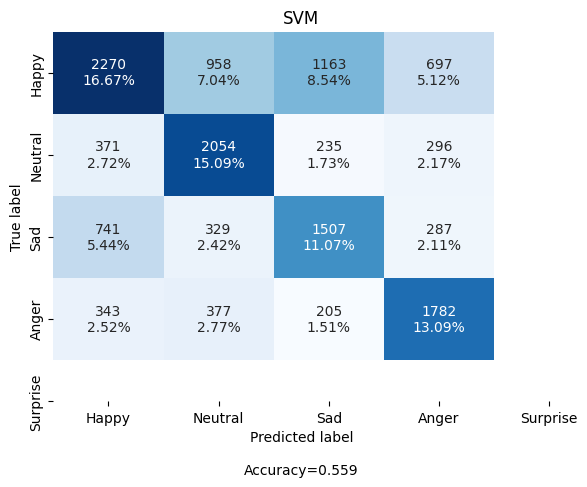

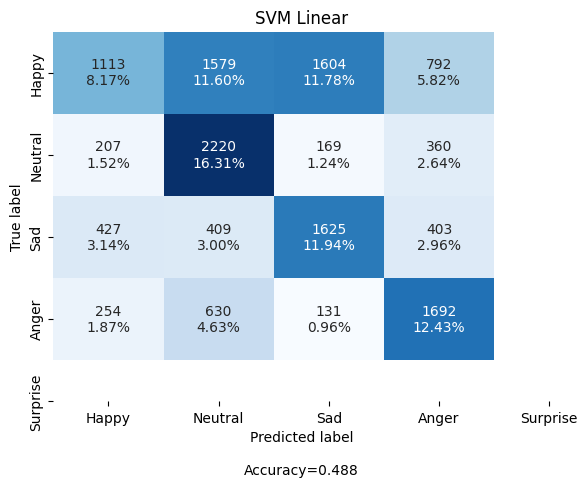

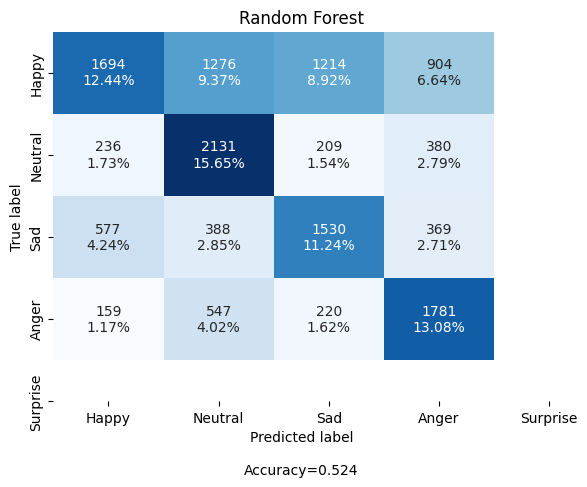

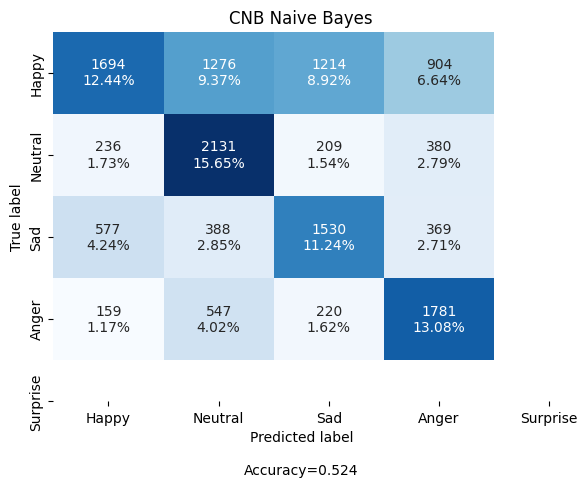

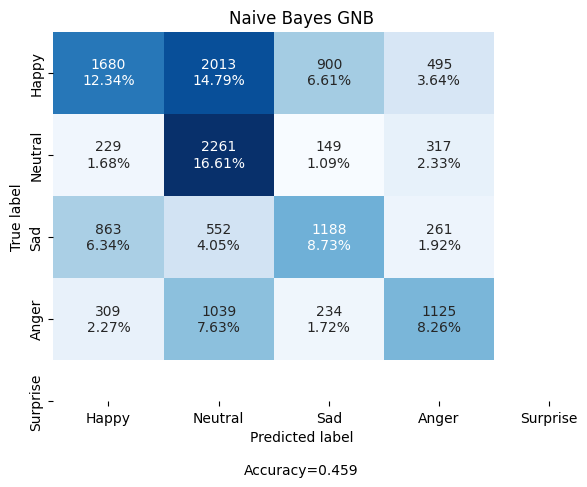

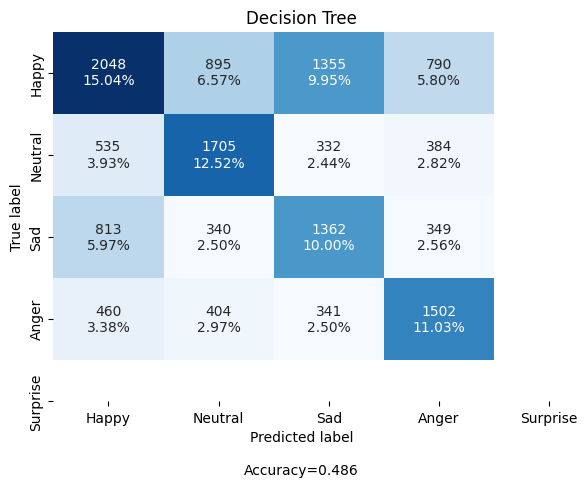

In [285]:
CMplot( y_test_archieve_z_p, svm_y_p_archieve_z, svm_y_p_archieve_linear_z,
       rf_a_p_z, rf_a_p_z, gnd_a_p_z, tree_a_p_z)

In [286]:
metics_reports(y_test_archieve_z_p, svm_y_p_archieve_z)

Accurary Score
0.5591626882115314
F1 Score
0.5632438244359557
Classification Report
              precision    recall  f1-score   support

           1       0.61      0.45      0.52      5088
           2       0.55      0.69      0.62      2956
           3       0.48      0.53      0.50      2864
           4       0.58      0.66      0.62      2707

    accuracy                           0.56     13615
   macro avg       0.56      0.58      0.56     13615
weighted avg       0.57      0.56      0.56     13615



In [287]:
metics_reports(y_test_archieve_z_p, svm_y_p_archieve_linear_z)

Accurary Score
0.4884318766066838
F1 Score
0.4901006321084729
Classification Report
              precision    recall  f1-score   support

           1       0.56      0.22      0.31      5088
           2       0.46      0.75      0.57      2956
           3       0.46      0.57      0.51      2864
           4       0.52      0.63      0.57      2707

    accuracy                           0.49     13615
   macro avg       0.50      0.54      0.49     13615
weighted avg       0.51      0.49      0.46     13615



In [288]:
metics_reports(y_test_archieve_z_p, rf_a_p_z)

Accurary Score
0.5241278002203452
F1 Score
0.5269603726018546
Classification Report
              precision    recall  f1-score   support

           1       0.64      0.33      0.44      5088
           2       0.49      0.72      0.58      2956
           3       0.48      0.53      0.51      2864
           4       0.52      0.66      0.58      2707

    accuracy                           0.52     13615
   macro avg       0.53      0.56      0.53     13615
weighted avg       0.55      0.52      0.51     13615



In [289]:
metics_reports(y_test_archieve_z_p, gnd_a_p_z)

Accurary Score
0.45934630921777453
F1 Score
0.4570069413184119
Classification Report
              precision    recall  f1-score   support

           1       0.55      0.33      0.41      5088
           2       0.39      0.76      0.51      2956
           3       0.48      0.41      0.45      2864
           4       0.51      0.42      0.46      2707

    accuracy                           0.46     13615
   macro avg       0.48      0.48      0.46     13615
weighted avg       0.49      0.46      0.45     13615



In [290]:
metics_reports(y_test_archieve_z_p, tree_a_p_z)

Accurary Score
0.4860080793242747
F1 Score
0.48971677311178796
Classification Report
              precision    recall  f1-score   support

           1       0.53      0.40      0.46      5088
           2       0.51      0.58      0.54      2956
           3       0.40      0.48      0.44      2864
           4       0.50      0.55      0.52      2707

    accuracy                           0.49     13615
   macro avg       0.48      0.50      0.49     13615
weighted avg       0.49      0.49      0.48     13615



### Archieve Persence 
- Best Model: SVM
- Worst Model: CNB

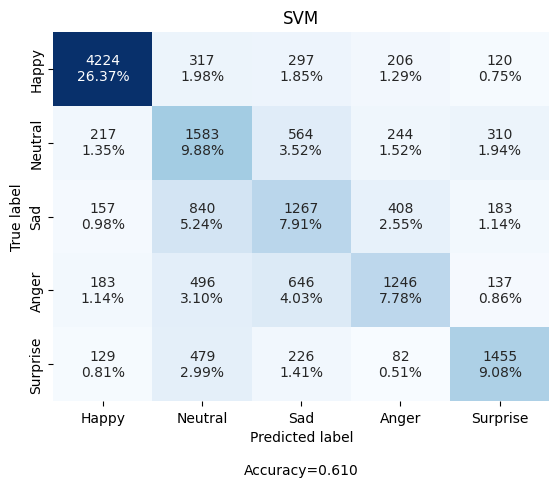

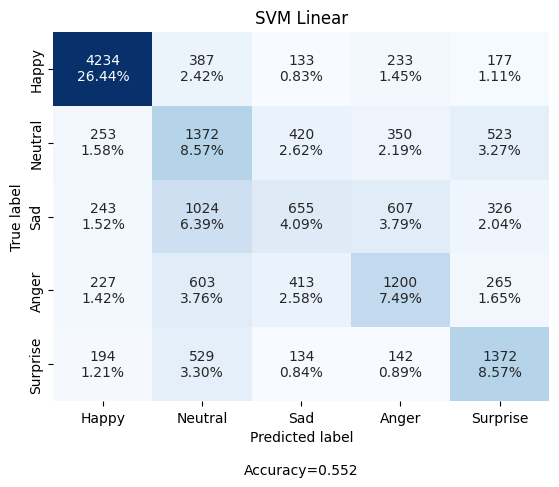

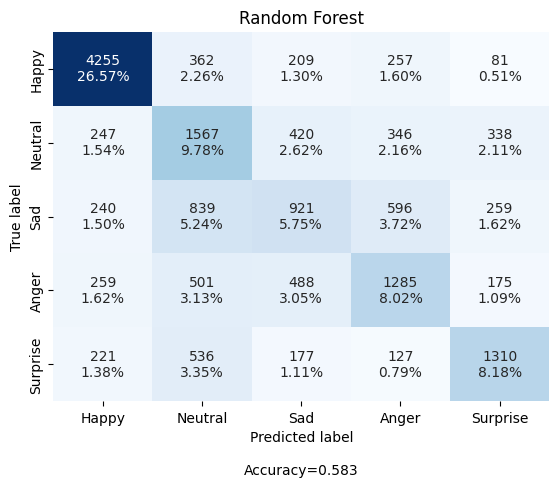

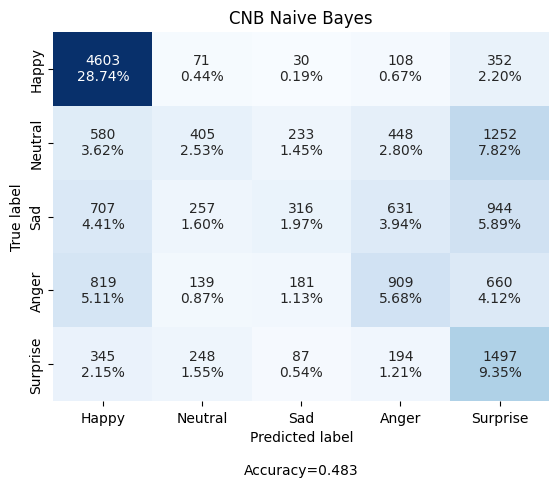

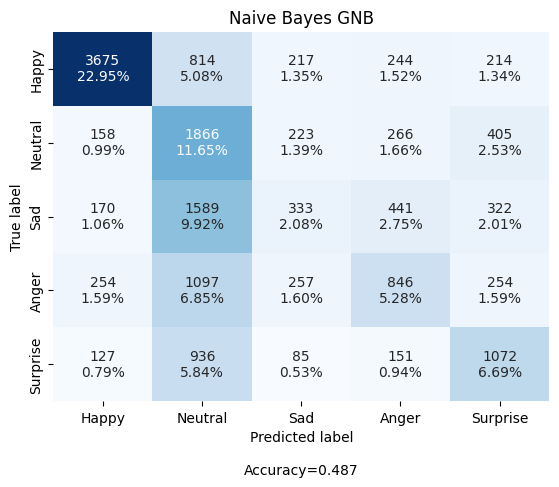

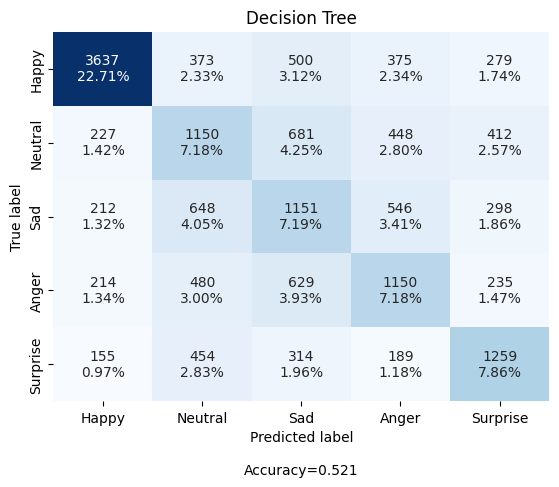

In [291]:
CMplot(y_test_archieve_p, svm_y_archieve_p, svm_linear_y_archieve_p,
       rf_archieve_p_y, cnb_archieve_p_y, gnd_archieve_p_y, tree_archieve_p_y)

In [292]:
metics_reports(y_test_archieve_p, svm_y_archieve_p)

Accurary Score
0.6103271728271729
F1 Score
0.5787637620181847
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.82      0.84      5164
           2       0.43      0.54      0.48      2918
           3       0.42      0.44      0.43      2855
           4       0.57      0.46      0.51      2708
           5       0.66      0.61      0.64      2371

    accuracy                           0.61     16016
   macro avg       0.59      0.58      0.58     16016
weighted avg       0.62      0.61      0.61     16016



In [293]:
metics_reports(y_test_archieve_p, svm_linear_y_archieve_p)

Accurary Score
0.551510989010989
F1 Score
0.501958886858142
Classification Report
              precision    recall  f1-score   support

           1       0.82      0.82      0.82      5164
           2       0.35      0.47      0.40      2918
           3       0.37      0.23      0.28      2855
           4       0.47      0.44      0.46      2708
           5       0.52      0.58      0.55      2371

    accuracy                           0.55     16016
   macro avg       0.51      0.51      0.50     16016
weighted avg       0.55      0.55      0.55     16016



In [294]:
metics_reports(y_test_archieve_p, rf_archieve_p_y)

Accurary Score
0.583041958041958
F1 Score
0.5419753015702702
Classification Report
              precision    recall  f1-score   support

           1       0.81      0.82      0.82      5164
           2       0.41      0.54      0.47      2918
           3       0.42      0.32      0.36      2855
           4       0.49      0.47      0.48      2708
           5       0.61      0.55      0.58      2371

    accuracy                           0.58     16016
   macro avg       0.55      0.54      0.54     16016
weighted avg       0.58      0.58      0.58     16016



In [295]:
metics_reports(y_test_archieve_p, cnb_archieve_p_y)

Accurary Score
0.48264235764235763
F1 Score
0.3823314527510812
Classification Report
              precision    recall  f1-score   support

           1       0.65      0.89      0.75      5164
           2       0.36      0.14      0.20      2918
           3       0.37      0.11      0.17      2855
           4       0.40      0.34      0.36      2708
           5       0.32      0.63      0.42      2371

    accuracy                           0.48     16016
   macro avg       0.42      0.42      0.38     16016
weighted avg       0.46      0.48      0.43     16016



In [296]:
metics_reports(y_test_archieve_p, gnd_archieve_p_y)

Accurary Score
0.4865134865134865
F1 Score
0.4335990845989076
Classification Report
              precision    recall  f1-score   support

           1       0.84      0.71      0.77      5164
           2       0.30      0.64      0.40      2918
           3       0.30      0.12      0.17      2855
           4       0.43      0.31      0.36      2708
           5       0.47      0.45      0.46      2371

    accuracy                           0.49     16016
   macro avg       0.47      0.45      0.43     16016
weighted avg       0.52      0.49      0.48     16016



In [297]:
metics_reports(y_test_archieve_p, tree_archieve_p_y)

Accurary Score
0.5211663336663337
F1 Score
0.4915626806007213
Classification Report
              precision    recall  f1-score   support

           1       0.82      0.70      0.76      5164
           2       0.37      0.39      0.38      2918
           3       0.35      0.40      0.38      2855
           4       0.42      0.42      0.42      2708
           5       0.51      0.53      0.52      2371

    accuracy                           0.52     16016
   macro avg       0.49      0.49      0.49     16016
weighted avg       0.54      0.52      0.53     16016



### Archieve Intensity
- Best Model: SVM
- Worst Model: CNB

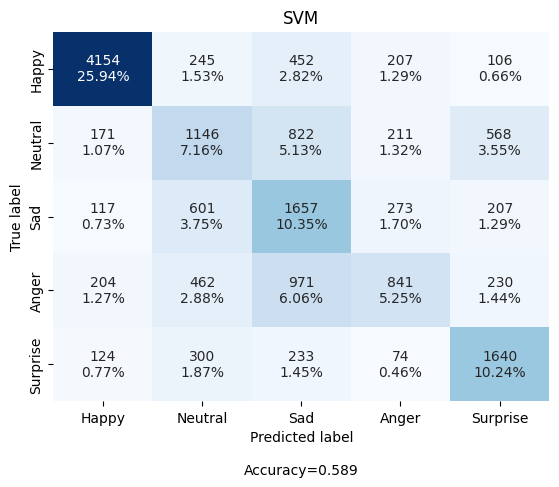

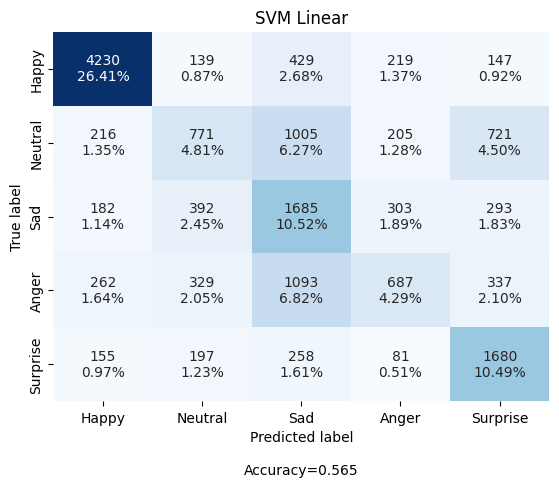

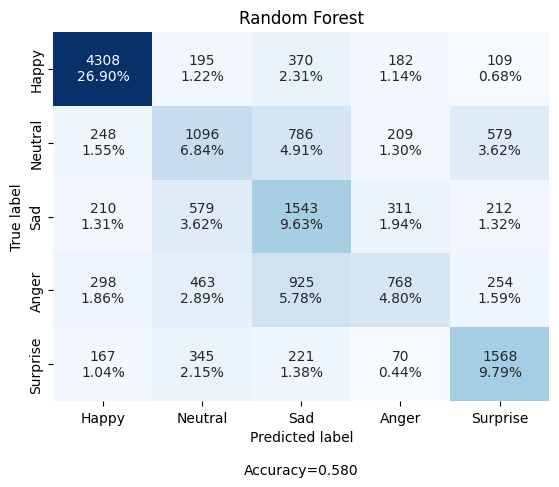

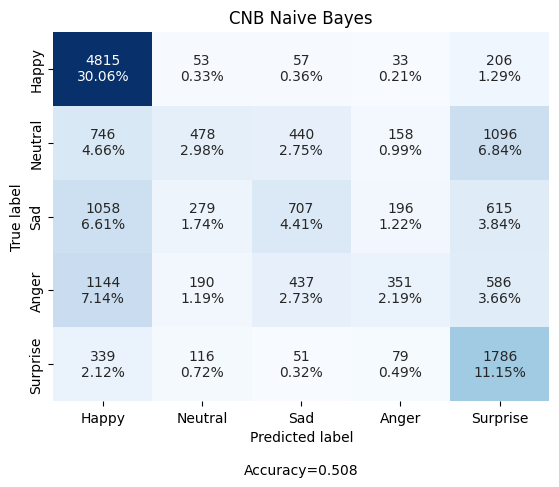

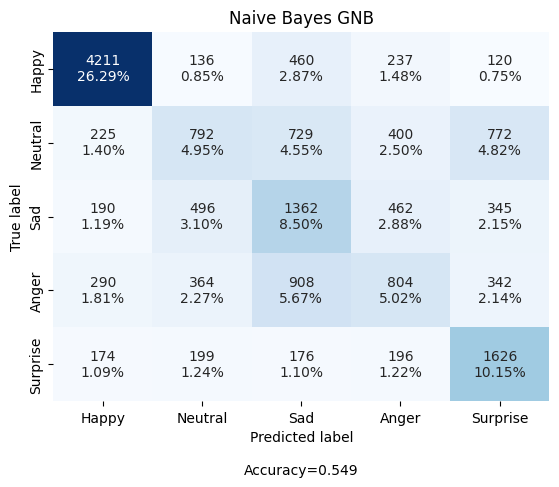

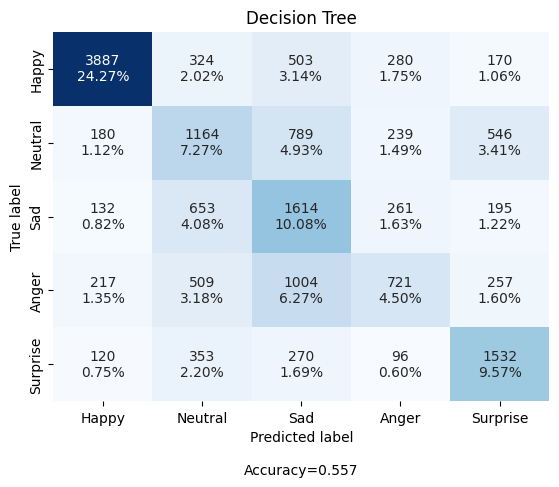

In [298]:
CMplot( y_test_archieve_i, svm_y_archieve_i, svm_linear_y_archieve_i,
       rf_archieve_i_y, cnb_archieve_i_y, gnd_archieve_i_y, tree_archieve_i_y)

In [299]:
metics_reports(y_test_archieve_i, svm_y_archieve_i)

Accurary Score
0.5892857142857143
F1 Score
0.5489568135173052
Classification Report
              precision    recall  f1-score   support

           1       0.87      0.80      0.84      5164
           2       0.42      0.39      0.40      2918
           3       0.40      0.58      0.47      2855
           4       0.52      0.31      0.39      2708
           5       0.60      0.69      0.64      2371

    accuracy                           0.59     16016
   macro avg       0.56      0.56      0.55     16016
weighted avg       0.60      0.59      0.59     16016



In [300]:
metics_reports(y_test_archieve_i, svm_linear_y_archieve_i)

Accurary Score
0.5652472527472527
F1 Score
0.5092155752485338
Classification Report
              precision    recall  f1-score   support

           1       0.84      0.82      0.83      5164
           2       0.42      0.26      0.32      2918
           3       0.38      0.59      0.46      2855
           4       0.46      0.25      0.33      2708
           5       0.53      0.71      0.61      2371

    accuracy                           0.57     16016
   macro avg       0.53      0.53      0.51     16016
weighted avg       0.57      0.57      0.55     16016



In [301]:
metics_reports(y_test_archieve_i, rf_archieve_i_y)

Accurary Score
0.5796078921078921
F1 Score
0.5316988863347845
Classification Report
              precision    recall  f1-score   support

           1       0.82      0.83      0.83      5164
           2       0.41      0.38      0.39      2918
           3       0.40      0.54      0.46      2855
           4       0.50      0.28      0.36      2708
           5       0.58      0.66      0.62      2371

    accuracy                           0.58     16016
   macro avg       0.54      0.54      0.53     16016
weighted avg       0.58      0.58      0.57     16016



In [302]:
metics_reports(y_test_archieve_i, cnb_archieve_i_y)

Accurary Score
0.5080544455544456
F1 Score
0.40187220772719723
Classification Report
              precision    recall  f1-score   support

           1       0.59      0.93      0.73      5164
           2       0.43      0.16      0.24      2918
           3       0.42      0.25      0.31      2855
           4       0.43      0.13      0.20      2708
           5       0.42      0.75      0.54      2371

    accuracy                           0.51     16016
   macro avg       0.46      0.45      0.40     16016
weighted avg       0.48      0.51      0.45     16016



In [303]:
metics_reports(y_test_archieve_i, gnd_archieve_i_y)

Accurary Score
0.5491383616383616
F1 Score
0.4963444775095356
Classification Report
              precision    recall  f1-score   support

           1       0.83      0.82      0.82      5164
           2       0.40      0.27      0.32      2918
           3       0.37      0.48      0.42      2855
           4       0.38      0.30      0.33      2708
           5       0.51      0.69      0.58      2371

    accuracy                           0.55     16016
   macro avg       0.50      0.51      0.50     16016
weighted avg       0.55      0.55      0.54     16016



In [304]:
metics_reports(y_test_archieve_i, tree_archieve_i_y)

Accurary Score
0.5568181818181818
F1 Score
0.5185296331618892
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.75      0.80      5164
           2       0.39      0.40      0.39      2918
           3       0.39      0.57      0.46      2855
           4       0.45      0.27      0.33      2708
           5       0.57      0.65      0.60      2371

    accuracy                           0.56     16016
   macro avg       0.53      0.53      0.52     16016
weighted avg       0.58      0.56      0.56     16016



### Archieve Intensity + Presnce
- Best Model: SVM
- Worst Model: CNB

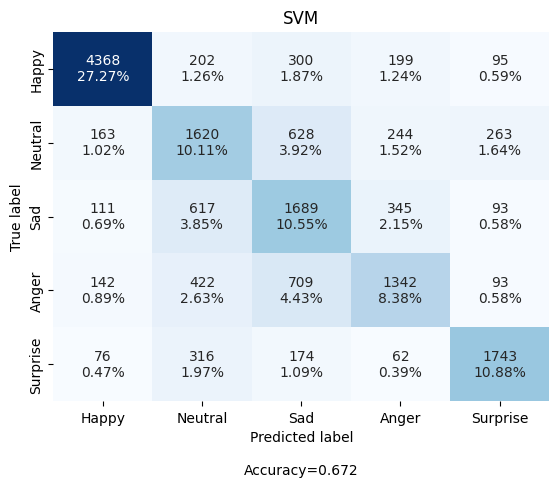

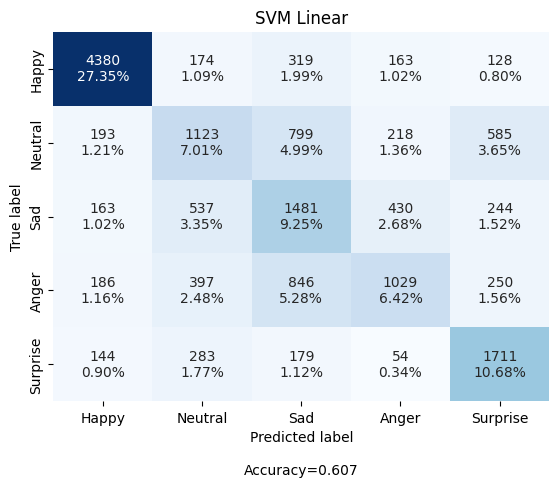

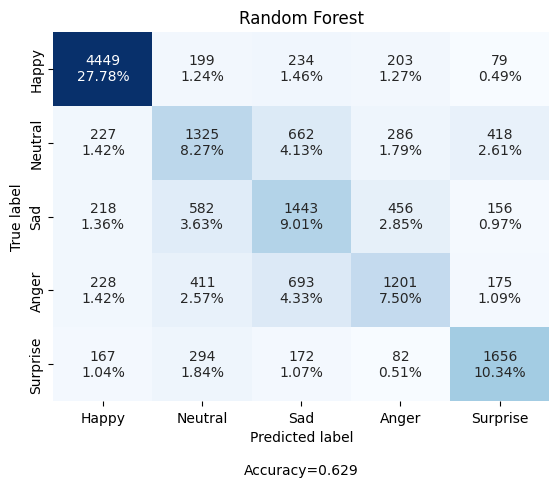

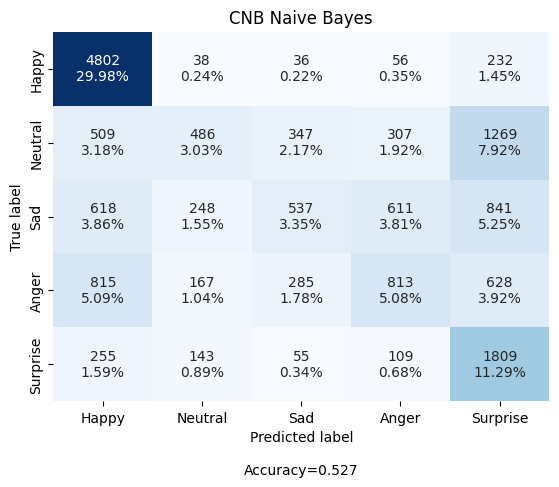

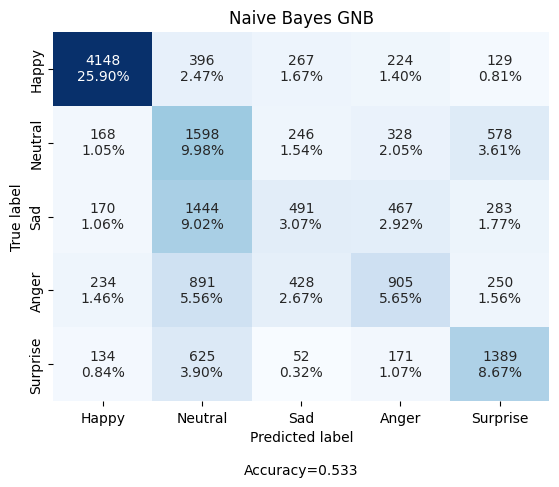

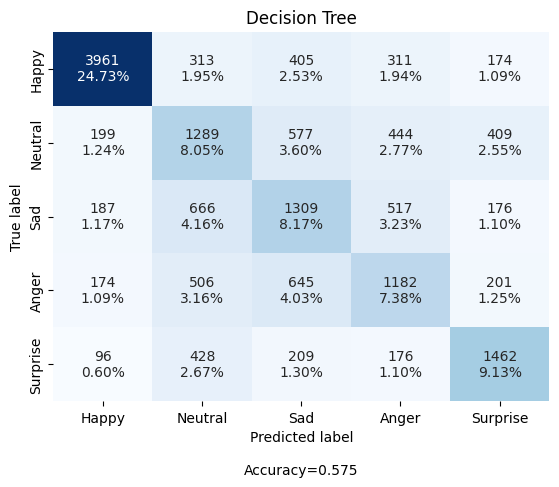

In [305]:
CMplot(y_test_archieve_ip, svm_y_archieve_ip, svm_linear_y_archieve_ip,
       rf_archieve_ip_y, cnb_archieve_ip_y, gnd_archieve_ip_y, tree_archieve_ip_y)

In [306]:
metics_reports(y_test_archieve_ip, svm_y_archieve_ip)

Accurary Score
0.6719530469530469
F1 Score
0.6461573148913865
Classification Report
              precision    recall  f1-score   support

           1       0.90      0.85      0.87      5164
           2       0.51      0.56      0.53      2918
           3       0.48      0.59      0.53      2855
           4       0.61      0.50      0.55      2708
           5       0.76      0.74      0.75      2371

    accuracy                           0.67     16016
   macro avg       0.65      0.64      0.65     16016
weighted avg       0.69      0.67      0.68     16016



In [307]:
metics_reports(y_test_archieve_ip, svm_linear_y_archieve_ip)

Accurary Score
0.6071428571428571
F1 Score
0.5642300172583598
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.85      0.86      5164
           2       0.45      0.38      0.41      2918
           3       0.41      0.52      0.46      2855
           4       0.54      0.38      0.45      2708
           5       0.59      0.72      0.65      2371

    accuracy                           0.61     16016
   macro avg       0.57      0.57      0.56     16016
weighted avg       0.61      0.61      0.60     16016



In [308]:
metics_reports(y_test_archieve_ip, rf_archieve_ip_y)

Accurary Score
0.628996003996004
F1 Score
0.591785235766865
Classification Report
              precision    recall  f1-score   support

           1       0.84      0.86      0.85      5164
           2       0.47      0.45      0.46      2918
           3       0.45      0.51      0.48      2855
           4       0.54      0.44      0.49      2708
           5       0.67      0.70      0.68      2371

    accuracy                           0.63     16016
   macro avg       0.59      0.59      0.59     16016
weighted avg       0.63      0.63      0.63     16016



In [309]:
metics_reports(y_test_archieve_ip, cnb_archieve_ip_y)

Accurary Score
0.5274100899100899
F1 Score
0.4305578646693606
Classification Report
              precision    recall  f1-score   support

           1       0.69      0.93      0.79      5164
           2       0.45      0.17      0.24      2918
           3       0.43      0.19      0.26      2855
           4       0.43      0.30      0.35      2708
           5       0.38      0.76      0.51      2371

    accuracy                           0.53     16016
   macro avg       0.47      0.47      0.43     16016
weighted avg       0.51      0.53      0.48     16016



In [310]:
metics_reports(y_test_archieve_ip, gnd_archieve_ip_y)

Accurary Score
0.5326548451548452
F1 Score
0.47857451398594436
Classification Report
              precision    recall  f1-score   support

           1       0.85      0.80      0.83      5164
           2       0.32      0.55      0.41      2918
           3       0.33      0.17      0.23      2855
           4       0.43      0.33      0.38      2708
           5       0.53      0.59      0.56      2371

    accuracy                           0.53     16016
   macro avg       0.49      0.49      0.48     16016
weighted avg       0.54      0.53      0.53     16016



In [311]:
metics_reports(y_test_archieve_ip, tree_archieve_ip_y)

Accurary Score
0.5746128871128872
F1 Score
0.5440863250110155
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.77      0.81      5164
           2       0.40      0.44      0.42      2918
           3       0.42      0.46      0.44      2855
           4       0.45      0.44      0.44      2708
           5       0.60      0.62      0.61      2371

    accuracy                           0.57     16016
   macro avg       0.55      0.54      0.54     16016
weighted avg       0.59      0.57      0.58     16016



### Both Datasets Intensity
- Best Model:
- Worst Model:

In [312]:
CMplot(y_test_i, svm_y_i, svm_y_l_i,
       rf_i_y, cnb_i_y, gnd_i_y, tree_i_y)

ValueError: Found input variables with inconsistent numbers of samples: [32032, 16016]

In [313]:
metics_reports(y_test_i, svm_y_i)

Accurary Score


ValueError: Found input variables with inconsistent numbers of samples: [32032, 16016]

In [ ]:
metics_reports(y_test_i, svm_y_l_i)

In [314]:
metics_reports(y_test_i, rf_i_y)

Accurary Score


ValueError: Found input variables with inconsistent numbers of samples: [32032, 16016]

In [ ]:
metics_reports(y_test_i, cnb_i_y)

In [ ]:
metics_reports(y_test_i, gnd_i_y)

In [ ]:
metics_reports(y_test_i, tree_i_y)

### Both Datasets Presence
- Best Model: TREE
- Worst Model: NB 

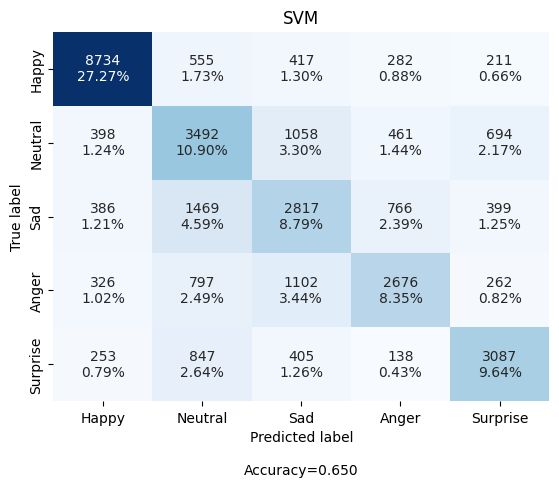

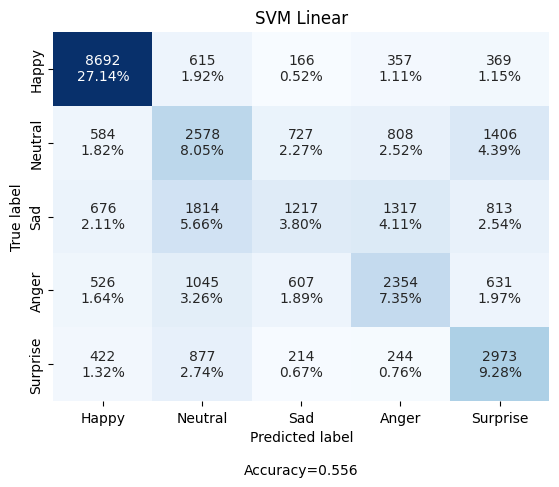

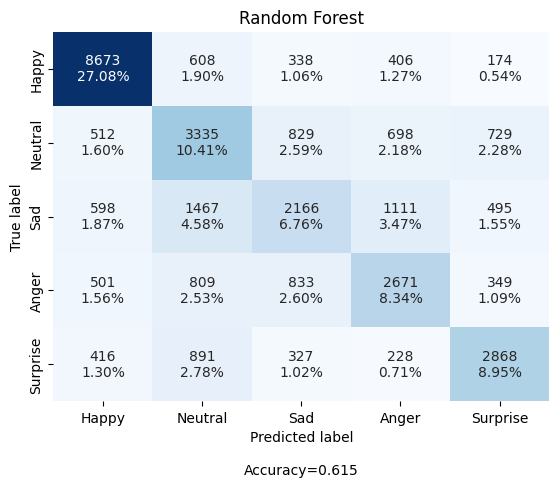

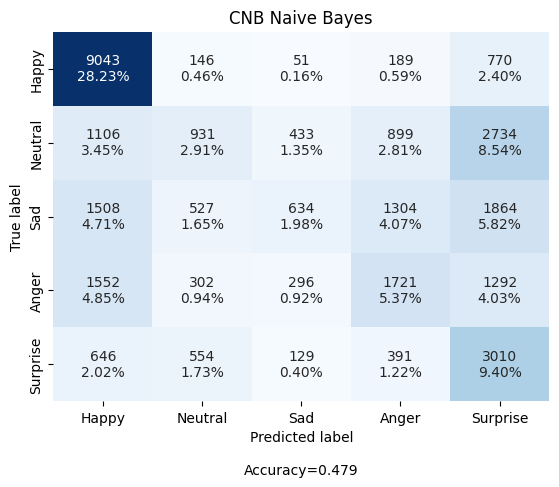

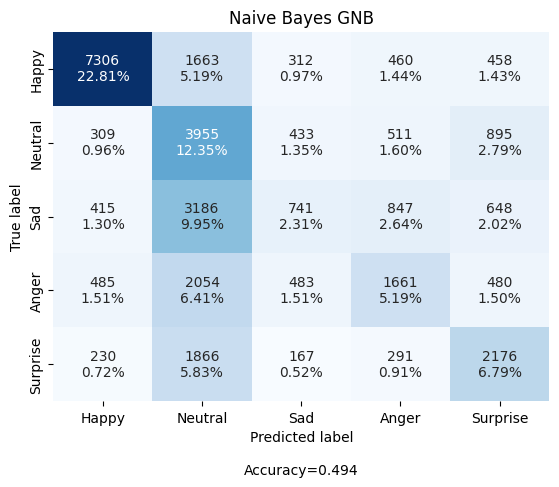

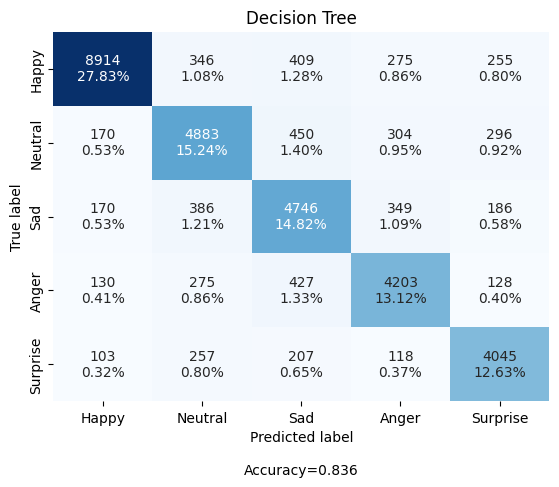

In [315]:
CMplot(y_test_p, svm_y_p, svm_y_l_p,
       rf_y_p, cnb_p_y, gnd_p_y, tree_p_y)

In [321]:
metics_reports(y_test_p, svm_y_p)

Accurary Score
0.649537962037962
F1 Score
0.6187250568166635
Classification Report
              precision    recall  f1-score   support

           1       0.87      0.86      0.86     10199
           2       0.49      0.57      0.53      6103
           3       0.49      0.48      0.48      5837
           4       0.62      0.52      0.56      5163
           5       0.66      0.65      0.66      4730

    accuracy                           0.65     32032
   macro avg       0.62      0.62      0.62     32032
weighted avg       0.65      0.65      0.65     32032



In [320]:
metics_reports(y_test_p, svm_y_l_p)

Accurary Score
0.5561313686313686
F1 Score
0.5002407842615465
Classification Report
              precision    recall  f1-score   support

           1       0.80      0.85      0.82     10199
           2       0.37      0.42      0.40      6103
           3       0.42      0.21      0.28      5837
           4       0.46      0.46      0.46      5163
           5       0.48      0.63      0.54      4730

    accuracy                           0.56     32032
   macro avg       0.51      0.51      0.50     32032
weighted avg       0.55      0.56      0.54     32032



In [319]:
metics_reports(y_test_p, rf_y_p)

Accurary Score
0.6154158341658341
F1 Score
0.5775528989421187
Classification Report
              precision    recall  f1-score   support

           1       0.81      0.85      0.83     10199
           2       0.47      0.55      0.50      6103
           3       0.48      0.37      0.42      5837
           4       0.52      0.52      0.52      5163
           5       0.62      0.61      0.61      4730

    accuracy                           0.62     32032
   macro avg       0.58      0.58      0.58     32032
weighted avg       0.61      0.62      0.61     32032



In [318]:
metics_reports(y_test_p, cnb_p_y)

Accurary Score
0.4788648851148851
F1 Score
0.3830533390136071
Classification Report
              precision    recall  f1-score   support

           1       0.65      0.89      0.75     10199
           2       0.38      0.15      0.22      6103
           3       0.41      0.11      0.17      5837
           4       0.38      0.33      0.36      5163
           5       0.31      0.64      0.42      4730

    accuracy                           0.48     32032
   macro avg       0.43      0.42      0.38     32032
weighted avg       0.46      0.48      0.43     32032



In [317]:
metics_reports(y_test_p, gnd_p_y)

Accurary Score
0.4944742757242757
F1 Score
0.4425688167157368
Classification Report
              precision    recall  f1-score   support

           1       0.84      0.72      0.77     10199
           2       0.31      0.65      0.42      6103
           3       0.35      0.13      0.19      5837
           4       0.44      0.32      0.37      5163
           5       0.47      0.46      0.46      4730

    accuracy                           0.49     32032
   macro avg       0.48      0.45      0.44     32032
weighted avg       0.53      0.49      0.49     32032



In [316]:
metics_reports(y_test_p, tree_p_y)

Accurary Score
0.8363823676323676
F1 Score
0.8270827725424391
Classification Report
              precision    recall  f1-score   support

           1       0.94      0.87      0.91     10199
           2       0.79      0.80      0.80      6103
           3       0.76      0.81      0.79      5837
           4       0.80      0.81      0.81      5163
           5       0.82      0.86      0.84      4730

    accuracy                           0.84     32032
   macro avg       0.82      0.83      0.83     32032
weighted avg       0.84      0.84      0.84     32032



### Both Datasets Intensity + Presence
- Best Model: TREE
- Worst Model: CNB

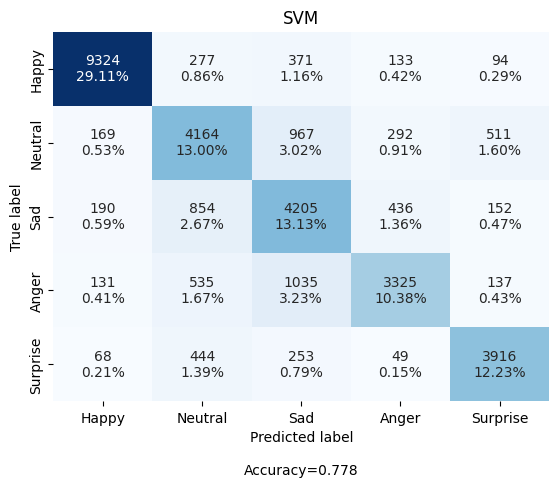

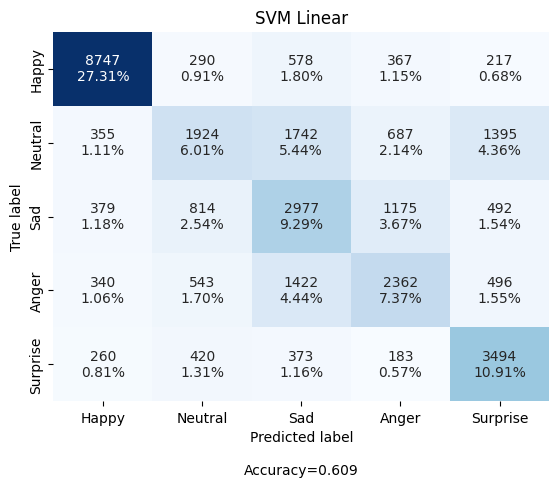

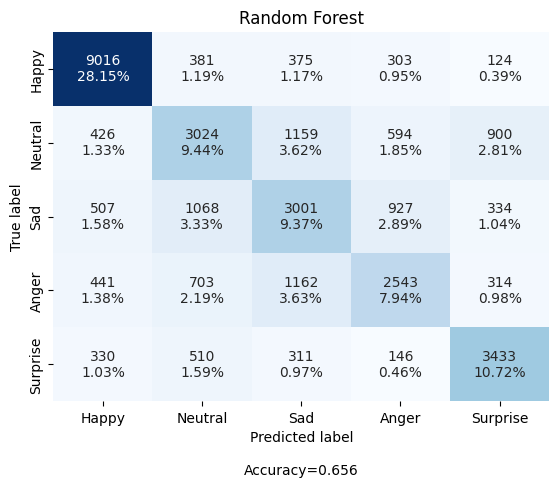

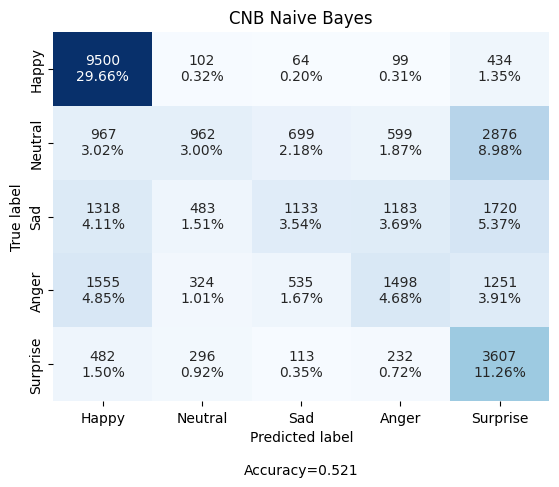

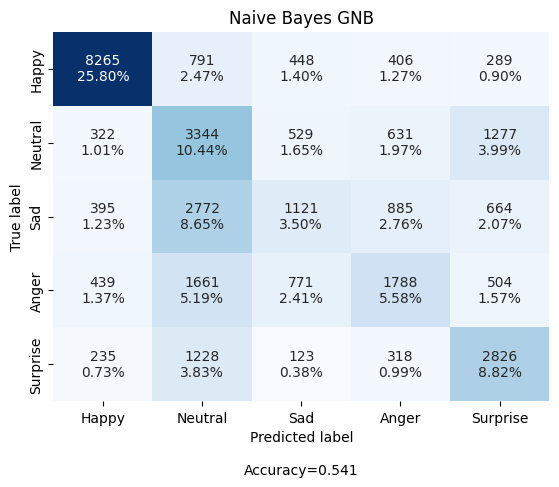

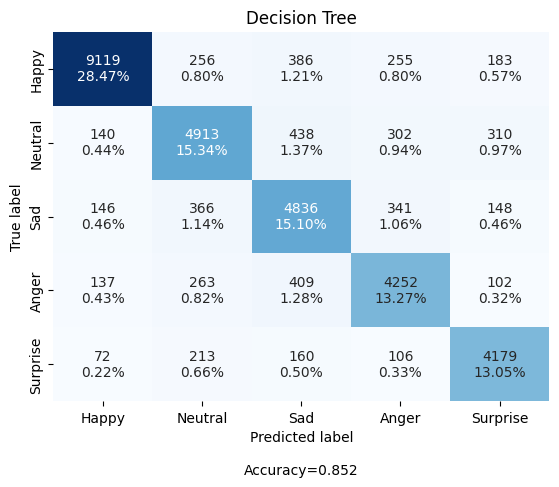

In [ ]:
CMplot( y_test_ip, svm_y_ip, svm_y_linear_ip,
       rf_ip_y, cnb_ip_y, gnd_ip_y, tree_ip_y)

In [ ]:
metics_reports(y_test_ip, svm_y_ip)

In [326]:
metics_reports(y_test_ip, svm_y_linear_ip)

Accurary Score
0.6092032967032966
F1 Score
0.56507277514512
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     10199
           2       0.47      0.36      0.40      6103
           3       0.42      0.50      0.46      5837
           4       0.52      0.41      0.46      5163
           5       0.56      0.74      0.64      4730

    accuracy                           0.61     32032
   macro avg       0.57      0.57      0.57     32032
weighted avg       0.61      0.61      0.60     32032



In [325]:
metics_reports(y_test_ip, rf_ip_y)

Accurary Score
0.6551261238761239
F1 Score
0.6200793607813393
Classification Report
              precision    recall  f1-score   support

           1       0.84      0.88      0.86     10199
           2       0.53      0.49      0.51      6103
           3       0.50      0.52      0.51      5837
           4       0.56      0.49      0.53      5163
           5       0.67      0.72      0.69      4730

    accuracy                           0.66     32032
   macro avg       0.62      0.62      0.62     32032
weighted avg       0.65      0.66      0.65     32032



In [324]:
metics_reports(y_test_ip, cnb_ip_y)

Accurary Score
0.5221341158841158
F1 Score
0.4269830649813303
Classification Report
              precision    recall  f1-score   support

           1       0.69      0.93      0.79     10199
           2       0.45      0.16      0.23      6103
           3       0.44      0.19      0.27      5837
           4       0.42      0.30      0.35      5163
           5       0.37      0.76      0.49      4730

    accuracy                           0.52     32032
   macro avg       0.47      0.47      0.43     32032
weighted avg       0.51      0.52      0.47     32032



In [323]:
metics_reports(y_test_ip, gnd_ip_y)

Accurary Score
0.5422077922077922
F1 Score
0.4899268796778589
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.81      0.83     10199
           2       0.34      0.55      0.42      6103
           3       0.38      0.19      0.25      5837
           4       0.44      0.35      0.39      5163
           5       0.51      0.60      0.55      4730

    accuracy                           0.54     32032
   macro avg       0.51      0.50      0.49     32032
weighted avg       0.55      0.54      0.54     32032



In [322]:
metics_reports(y_test_ip, tree_ip_y)

Accurary Score
0.8516795704295704
F1 Score
0.8418925296646318
Classification Report
              precision    recall  f1-score   support

           1       0.95      0.90      0.92     10199
           2       0.81      0.81      0.81      6103
           3       0.78      0.83      0.80      5837
           4       0.80      0.82      0.81      5163
           5       0.85      0.88      0.86      4730

    accuracy                           0.85     32032
   macro avg       0.84      0.85      0.84     32032
weighted avg       0.85      0.85      0.85     32032



## Best Models:
- Fer: Intensity + Presence SVM 68%
- Archieve: Intensity + Presence RF 63%
- Both: Intensity + Presence Tree 85%

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


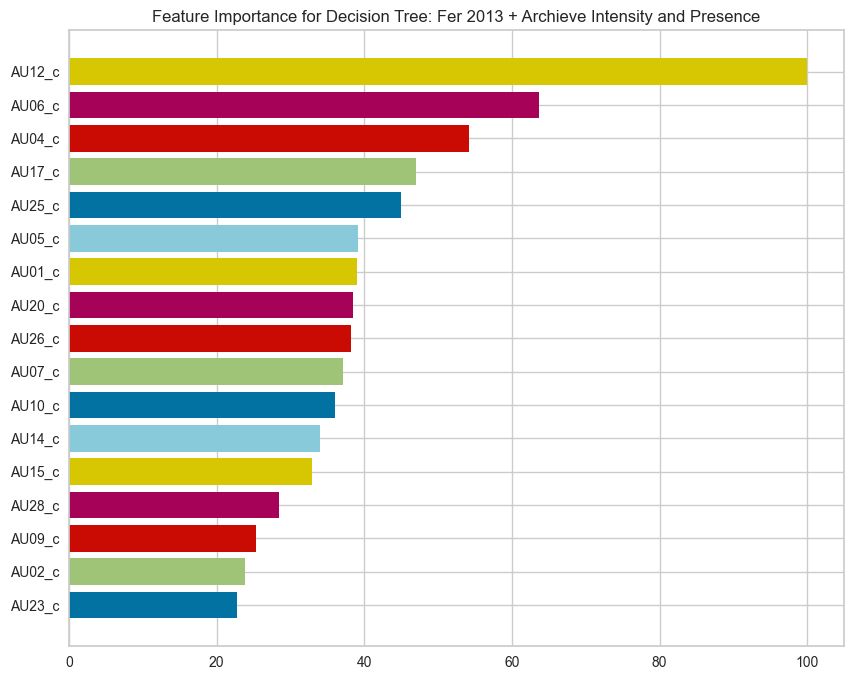

In [358]:
## Feature Importance for the Dataset: Fer + Archieve and Model: Tree and Features Selection: Intensity and Presence
fig , ax = plt.subplots(figsize=(10,8))
tree_viz = FeatureImportances(tree_ip)
tree_viz.fit(x_under_ip, y_under_ip)
fig.savefig('DTreeFeatureImp.png',dpi=300)
plt.title("Feature Importance for Decision Tree: Fer 2013 + Archieve Intensity and Presence")
plt.show()

In [ ]:
# Emotion Recogntion
